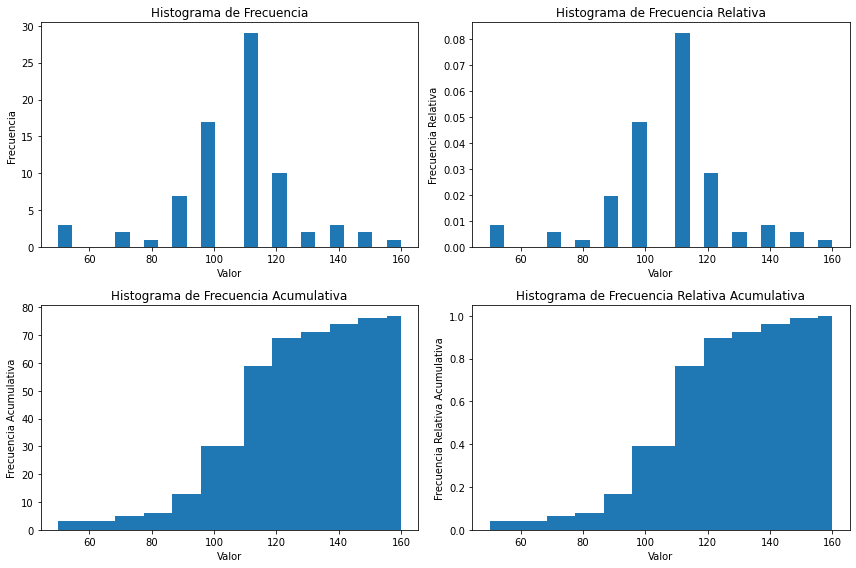

379.63089542036903
1.1985645933014353
1.0129870129870127


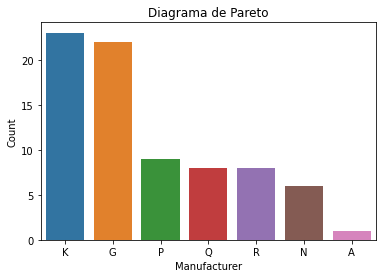

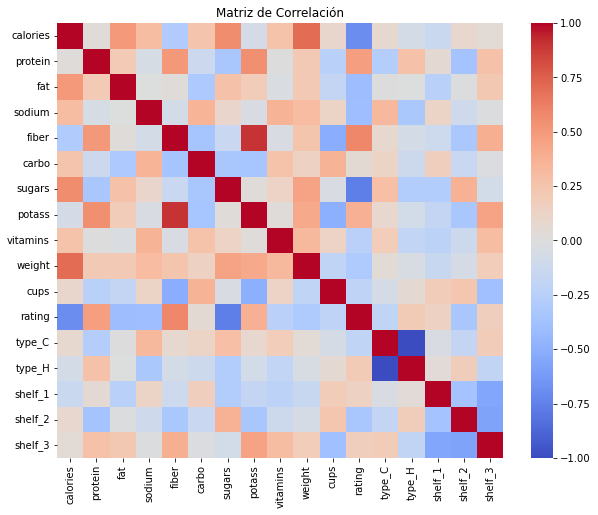

In [96]:
#BD9 (CEREALES)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Carga el conjunto de datos
df = pd.read_csv("cereal.csv")

# Seleccionar la columna de interés para el análisis
column_name = 'calories'

# Crear los histogramas
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df[column_name], bins='auto')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia')

plt.subplot(2, 2, 2)
plt.hist(df[column_name], bins='auto', density=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencia Relativa')

plt.subplot(2, 2, 3)
plt.hist(df[column_name], bins='auto', cumulative=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia Acumulativa')
plt.title('Histograma de Frecuencia Acumulativa')

plt.subplot(2, 2, 4)
plt.hist(df[column_name], bins='auto', density=True, cumulative=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia Relativa Acumulativa')
plt.title('Histograma de Frecuencia Relativa Acumulativa')

plt.tight_layout()
plt.show()


# Calcula la media, varianza y desviación estándar de las variables numéricas
mean_calories = df['calories'].mean()
mean_protein = df['protein'].mean()
mean_fat = df['fat'].mean()


var_calories = df['calories'].var()
var_protein = df['protein'].var()
var_fat = df['fat'].var()

print (var_calories)
print (var_protein)
print (var_fat)
std_calories = df['calories'].std()
std_protein = df['protein'].std()
std_fat = df['fat'].std()


# Crea un diagrama de Pareto para un porcentaje específico
percentage = 80  # Porcentaje a considerar
sorted_vals = df['mfr'].value_counts().sort_values(ascending=False)
cumulative_perc = (sorted_vals / sorted_vals.sum()).cumsum()
pareto_df = pd.DataFrame({'Manufacturer': sorted_vals.index, 'Count': sorted_vals.values, 'Cumulative Percentage': cumulative_perc.values})

# Filtra el porcentaje especificado en el diagrama de Pareto
filtered_pareto_df = pareto_df[pareto_df['Cumulative Percentage'] <= percentage]


# Diagrama de Pareto
sns.barplot(data=filtered_pareto_df, x='Manufacturer', y='Count')
plt.title('Diagrama de Pareto')
plt.show()

# Convertir variables categóricas en variables dummy
df_dummies = pd.get_dummies(df, columns=['type', 'shelf'])

# Calcular la matriz de correlación
corr_matrix = df_dummies.corr()

# Crear una visualización de la matriz de correlación (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.0%')
plt.title('Matriz de Correlación')
plt.show()



Media ajustada: 1.0129870129870129
Desviación estándar ajustada: 0.9999156651906576


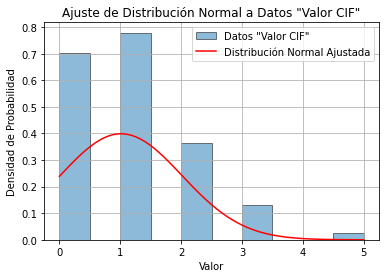

In [98]:
#BD9(CEREALES)
#Obtener la columna de interés para el ajuste de la distribución normal
co = df['fat']

# Ajustar una distribución normal a los datos de "Valor CIF" utilizando máxima verosimilitud
mu, std = norm.fit(co)

# Función de máxima verosimilitud para ajustar una distribución normal
def negative_log_likelihood(params):
    mu, std = params
    log_likelihood = -np.sum(norm.logpdf(co, mu, std))
    return log_likelihood

# Ajustar la distribución normal utilizando máxima verosimilitud
result = minimize(negative_log_likelihood, [mu, std])
mu_fit, std_fit = result.x

# Imprimir los parámetros ajustados
print("Media ajustada:", mu_fit)
print("Desviación estándar ajustada:", std_fit)

# Crear un histograma de los datos de "Valor CIF"
plt.hist(co, bins=10, edgecolor='black', alpha=0.5, density=True, label='Datos "Valor CIF"')

# Crear una línea que represente la distribución normal ajustada
x = np.linspace(min(co), max(co), 100)
y = norm.pdf(x, mu_fit, std_fit)
plt.plot(x, y, 'r-', label='Distribución Normal Ajustada')

plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución Normal a Datos "Valor CIF"')
plt.legend()
plt.grid(True)
plt.show()




Intercepto: 1.69636257416548
Pendientes:
calories   -0.008735
protein    -0.065039
fat         0.310630
sodium     -0.002228
fiber       0.052702
carbo       0.045898
sugars      0.029334
potass      0.002912
vitamins    0.013643
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  shelf   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.494
Date:                Mon, 24 Jul 2023   Prob (F-statistic):            0.00136
Time:                        21:31:09   Log-Likelihood:                -79.825
No. Observations:                  77   AIC:                             179.6
Df Residuals:                      67   BIC:                             203.1
Df Model:                           9                                         
Covariance Type:            nonrobust       

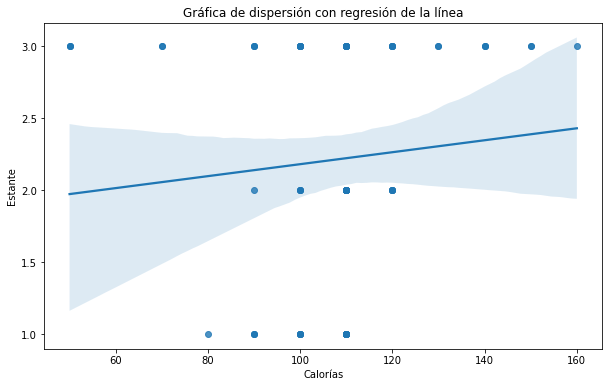

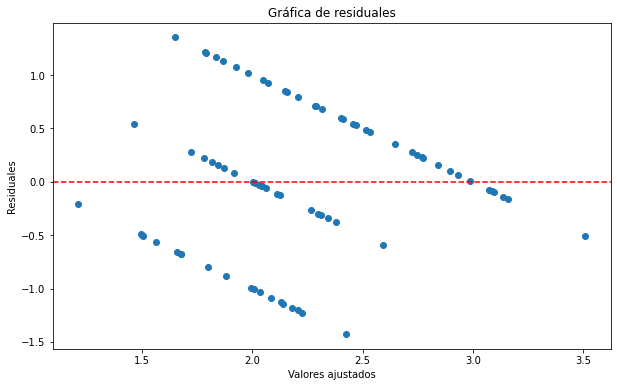

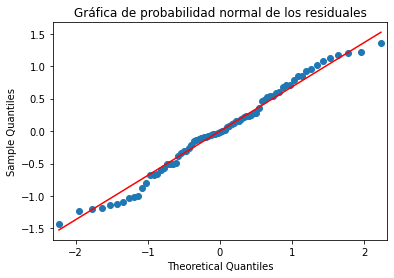


Tabla ANOVA para coeficientes:
<F test: F=3.494431118810747, p=0.0013611112998494234, df_denom=67, df_num=9>

R-cuadrado: 0.31945066918476506

Pruebas de t y valores de P:
calories:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0087      0.011     -0.822      0.414      -0.030       0.012
protein:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0650      0.122     -0.534      0.595      -0.308       0.178
fat:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [107]:
#BD9(CEREALES)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.anova import anova_lm


# Definir las variables independiente (X) y dependiente (Y)
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']]
Y = df['shelf']

# Agregar una columna de unos para la constante de la regresión
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(Y, X).fit()

# Obtener los coeficientes de la regresión
intercepto, pendiente = model.params['const'], model.params[1:]

# Imprimir los coeficientes
print(f'Intercepto: {intercepto}')
print('Pendientes:')
print(pendiente)

# Realizar el análisis de regresión
print(model.summary())

# Gráfica de dispersión con la regresión de la línea
plt.figure(figsize=(10, 6))
sns.regplot(x='calories', y='shelf', data=df)
plt.xlabel('Calorías')
plt.ylabel('Estante')
plt.title('Gráfica de dispersión con regresión de la línea')
plt.show()

# Gráfica de residuales
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuales')
plt.title('Gráfica de residuales')
plt.show()

# Gráfica de probabilidad normal
sm.qqplot(model.resid, line='s')
plt.title('Gráfica de probabilidad normal de los residuales')
plt.show()


# Tabla ANOVA para coeficientes
contrast_matrix = np.eye(len(model.params))
contrast_matrix = contrast_matrix[1:]  # Eliminar la fila correspondiente al intercepto
anova_results = model.f_test(contrast_matrix)

# Imprimir la tabla ANOVA
print("\nTabla ANOVA para coeficientes:")
print(anova_results)

# R-cuadrado
print("\nR-cuadrado:", model.rsquared)

# Pruebas de t y valores de P para coeficientes individuales
print("\nPruebas de t y valores de P:")
for i, param in enumerate(model.params.index[1:]):
    t_test = model.t_test(np.eye(len(model.params))[1:][i])
    print(f"{param}:")
    print(t_test)

# Intervalos de confianza para coeficientes
print("\nIntervalos de confianza para coeficientes:")
print(model.conf_int())

# Valores de las constantes de la línea de regresión (interceptor y pendiente)
print("\nValores de las constantes de la línea de regresión:")
print("Intercept:", model.params[0])
print("Slope:", model.params[1:])


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

Media:  32.955598455598455
Varianza: 106.9410217671089
Desviacion estandar: 10.341229219348582


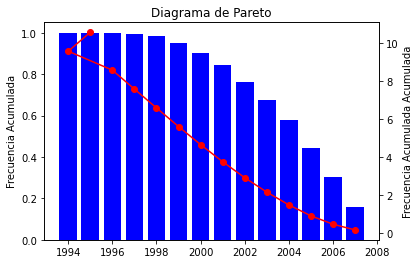

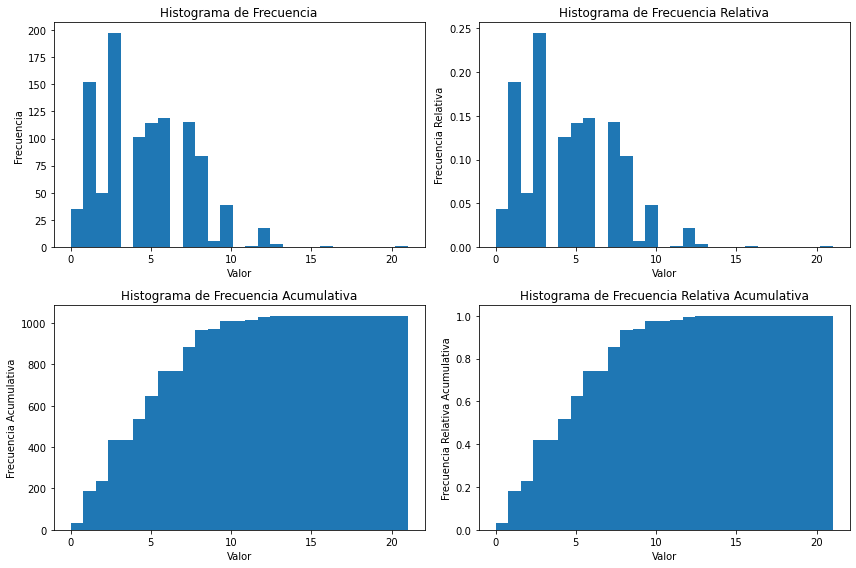

In [108]:
#BD10(CAMARAS)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import binom_test,ttest_ind, chi2_contingency, pearsonr,norm

# Cargar los datos del documento de las cámaras
df = pd.read_csv('camera_dataset.csv')
df=df.dropna()


# Media, varianza y desviación estándar
media = df['Zoom wide (W)'].mean()
varianza = df['Zoom wide (W)'].var()
desviacion_estandar = df['Zoom wide (W)'].std()

print('Media: ', media)
print('Varianza:',varianza)
print('Desviacion estandar:', desviacion_estandar)

# Diagrama de Pareto
frecuencia_acumulada = df['Release date'].value_counts().cumsum() / len(df)

fig, ax1 = plt.subplots()
ax1.bar(frecuencia_acumulada.index, frecuencia_acumulada.values, color='blue')
ax1.set_ylabel('Frecuencia Acumulada')

ax2 = ax1.twinx()
ax2.plot(frecuencia_acumulada.index, frecuencia_acumulada.values.cumsum(), color='red', marker='o')
ax2.set_ylabel('Frecuencia Acumulada Acumulada')

plt.title('Diagrama de Pareto')
plt.show()



# Seleccionar la columna de interés para el análisis
column_name = 'Effective pixels'

# Crear los histogramas
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df[column_name], bins='auto')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia')

plt.subplot(2, 2, 2)
plt.hist(df[column_name], bins='auto', density=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencia Relativa')

plt.subplot(2, 2, 3)
plt.hist(df[column_name], bins='auto', cumulative=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia Acumulativa')
plt.title('Histograma de Frecuencia Acumulativa')

plt.subplot(2, 2, 4)
plt.hist(df[column_name], bins='auto', density=True, cumulative=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia Relativa Acumulativa')
plt.title('Histograma de Frecuencia Relativa Acumulativa')

plt.tight_layout()
plt.show()



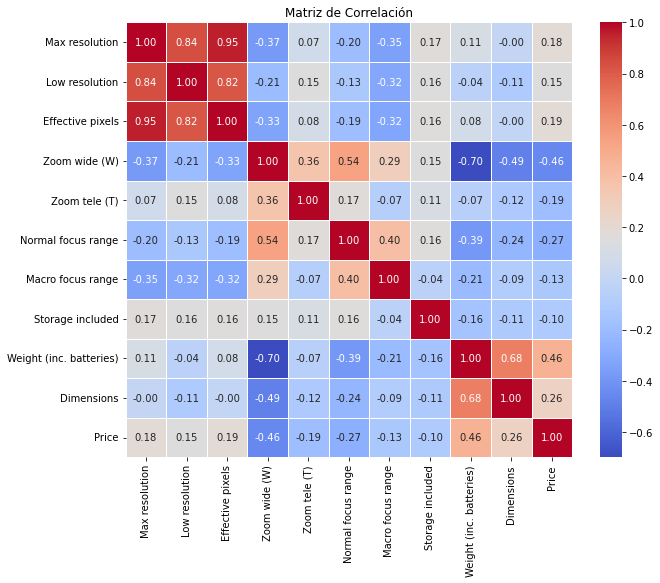

Media ajustada: 32.955598406874536
Desviación estándar ajustada: 10.336237122370356


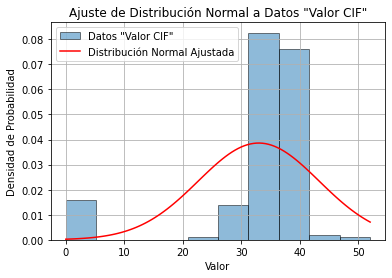

In [111]:
#BD10(CAMARAS)
# Eliminar las columnas 'Model' y 'Release Date'
columns_to_exclude = ['Model', 'Release date']
data_filtered = df.drop(columns=columns_to_exclude)

# Calcular la matriz de correlación
correlation_matrix = data_filtered.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


#Obtener la columna de interés para el ajuste de la distribución normal
co = df['Zoom wide (W)']

# Ajustar una distribución normal a los datos de "Valor CIF" utilizando máxima verosimilitud
mu, std = norm.fit(co)

# Función de máxima verosimilitud para ajustar una distribución normal
def negative_log_likelihood(params):
    mu, std = params
    log_likelihood = -np.sum(norm.logpdf(co, mu, std))
    return log_likelihood

# Ajustar la distribución normal utilizando máxima verosimilitud
result = minimize(negative_log_likelihood, [mu, std])
mu_fit, std_fit = result.x

# Imprimir los parámetros ajustados
print("Media ajustada:", mu_fit)
print("Desviación estándar ajustada:", std_fit)

# Crear un histograma de los datos de "Valor CIF"
plt.hist(co, bins=10, edgecolor='black', alpha=0.5, density=True, label='Datos "Valor CIF"')

# Crear una línea que represente la distribución normal ajustada
x = np.linspace(min(co), max(co), 100)
y = norm.pdf(x, mu_fit, std_fit)
plt.plot(x, y, 'r-', label='Distribución Normal Ajustada')

plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución Normal a Datos "Valor CIF"')
plt.legend()
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     12.97
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.54e-08
Time:                        21:46:17   Log-Likelihood:                -8323.9
No. Observations:                1036   AIC:                         1.666e+04
Df Residuals:                    1032   BIC:                         1.668e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              181.7271    140.843  

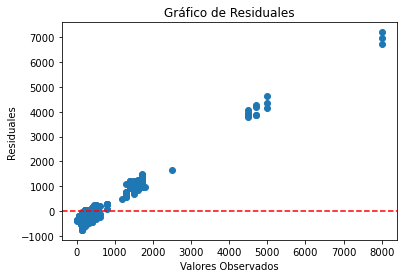

C:\Users\19546\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


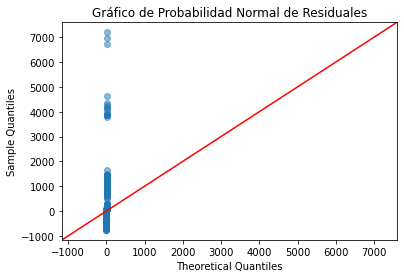

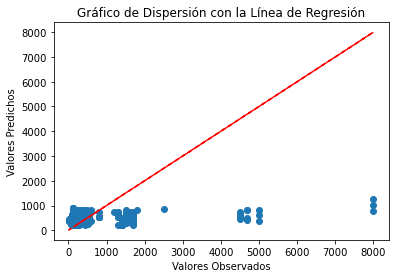

Valor R cuadrado: 0.036336445881477775
Prueba de F: 12.97105958797214
Pruebas de t:
 const               1.290281
Max resolution      0.354759
Low resolution     -0.225880
Effective pixels    1.604097
dtype: float64
Intervalos de Confianza:
                           0           1
const            -94.644293  458.098511
Max resolution    -0.175105    0.252392
Low resolution    -0.114579    0.090923
Effective pixels  -9.808368   97.664055
Valor del intercepto: 181.7271092954884
Valores de las pendientes:
 Max resolution       0.038644
Low resolution      -0.011828
Effective pixels    43.927844
dtype: float64


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

X = df[['Max resolution', 'Low resolution', 'Effective pixels']]
y = df['Price']

# Agregar una columna de intercepto para la regresión
X = sm.add_constant(X)

# Realizar la regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los coeficientes de la línea de regresión
intercepto = model.params[0]
pendientes = model.params[1:]

# Imprimir la tabla ANOVA
print(model.summary())

# Obtener el valor del R cuadrado
r_squared = model.rsquared

# Realizar las pruebas de t y F
t_values = model.tvalues
f_value = model.fvalue

# Obtener los intervalos de confianza para los coeficientes de la regresión
conf_intervals = model.conf_int()

# Crear gráfico de residuales
residuals = model.resid
plt.scatter(y, residuals)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel('Valores Observados')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.show()

# Crear gráfico de probabilidad normal de los residuales
QQ = ProbPlot(residuals)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plt.title('Gráfico de Probabilidad Normal de Residuales')
plt.show()

# Crear gráfico de dispersión con la línea de regresión
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.plot(y, y, color='red', linestyle='dashed')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de Dispersión con la Línea de Regresión')
plt.show()

# Imprimir resultados adicionales
print("Valor R cuadrado:", r_squared)
print("Prueba de F:", f_value)
print("Pruebas de t:\n", t_values)
print("Intervalos de Confianza:\n", conf_intervals)
print("Valor del intercepto:", intercepto)
print("Valores de las pendientes:\n", pendientes)


In [ ]:
------------------------------------------------------------------------------------------------------------------------

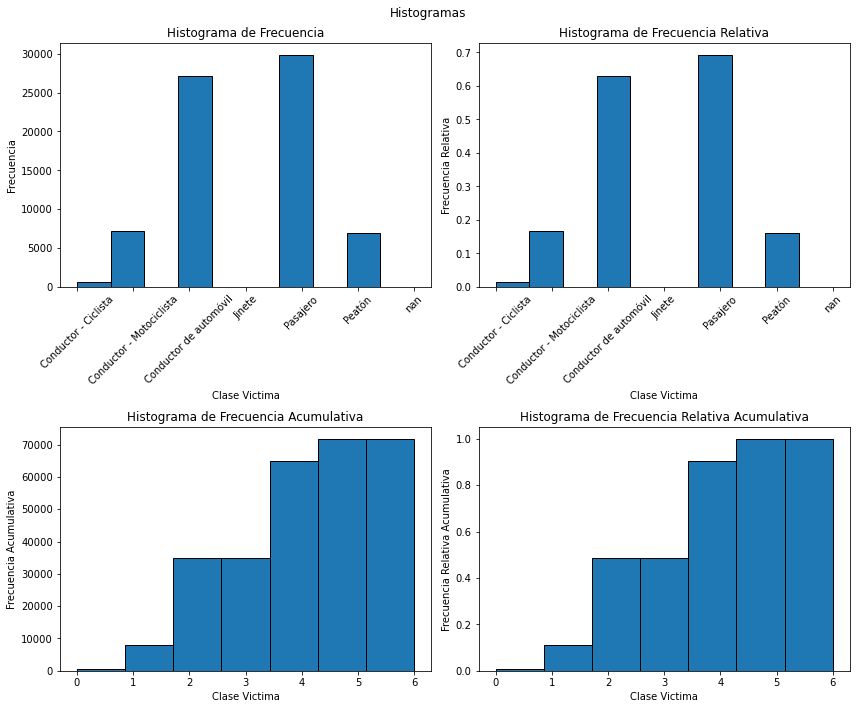

Media de Edad: 33.495721811150695
Varianza de Edad: 237.44387719171385
Desviación Estándar de Edad: 15.409214035495577


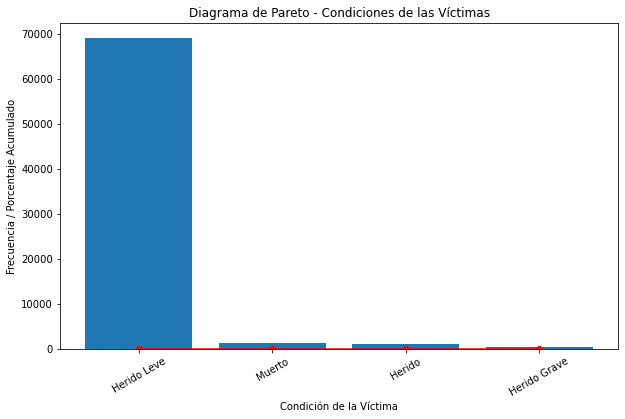

In [46]:
#BD4(VICTIMAS DE ACCIDENTES DE TRANSITO POR PROVINCIA)  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from scipy.optimize import minimize

# 1. Importar bibliotecas

# 2. Cargar los datos
data = pd.read_excel("Victima Accidentes de Tránsito en Panama (provincia).xlsx")


# Obtener la columna de interés para los histogramas
columna =data['Clase Victima'].astype(str).fillna('No especificado')

# Crear la figura y los cuatro subplots para los histogramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histogramas')

# Histograma de frecuencia
axs[0, 0].hist(columna, edgecolor='black')
axs[0, 0].set_title('Histograma de Frecuencia')
axs[0, 0].set_xlabel('Clase Victima')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].tick_params(axis='x', rotation=45)

# Histograma de frecuencia relativa
axs[0, 1].hist(columna, edgecolor='black', density=True)
axs[0, 1].set_title('Histograma de Frecuencia Relativa')
axs[0, 1].set_xlabel('Clase Victima')
axs[0, 1].set_ylabel('Frecuencia Relativa')
axs[0, 1].tick_params(axis='x', rotation=45)

# Codificar la columna "Clase Victima" como valores numéricos
label_encoder = LabelEncoder()
columna_codificada = label_encoder.fit_transform(columna.astype(str))

# Histograma de frecuencia acumulativa
axs[1, 0].hist(columna_codificada, bins=len(label_encoder.classes_), edgecolor='black', cumulative=True)
axs[1, 0].set_title('Histograma de Frecuencia Acumulativa')
axs[1, 0].set_xlabel('Clase Victima')
axs[1, 0].set_ylabel('Frecuencia Acumulativa')

# Histograma de frecuencia relativa acumulativa
axs[1, 1].hist(columna_codificada, bins=len(label_encoder.classes_), edgecolor='black', density=True, cumulative=True)
axs[1, 1].set_title('Histograma de Frecuencia Relativa Acumulativa')
axs[1, 1].set_xlabel('Clase Victima')
axs[1, 1].set_ylabel('Frecuencia Relativa Acumulativa')

# Ajustar los espacios entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar la figura
plt.show()


# 4. Media, varianza y desviación estándar de la edad de las víctimas
mean_age = data["Edad"].mean()
var_age = data["Edad"].var()
std_age = data["Edad"].std()

print("Media de Edad:", mean_age)
print("Varianza de Edad:", var_age)
print("Desviación Estándar de Edad:", std_age)

# 5. Diagrama de Pareto de la distribución de las condiciones de las víctimas
condicion_counts = data["Condicion Victima"].value_counts()
cumulative_perc = np.cumsum(condicion_counts) / condicion_counts.sum()

plt.figure(figsize=(10, 6))
plt.bar(condicion_counts.index, condicion_counts)
plt.plot(condicion_counts.index, cumulative_perc, color="red", marker="o")
plt.title("Diagrama de Pareto - Condiciones de las Víctimas")
plt.xlabel("Condición de la Víctima")
plt.ylabel("Frecuencia / Porcentaje Acumulado")
plt.xticks(rotation=30)
plt.show()




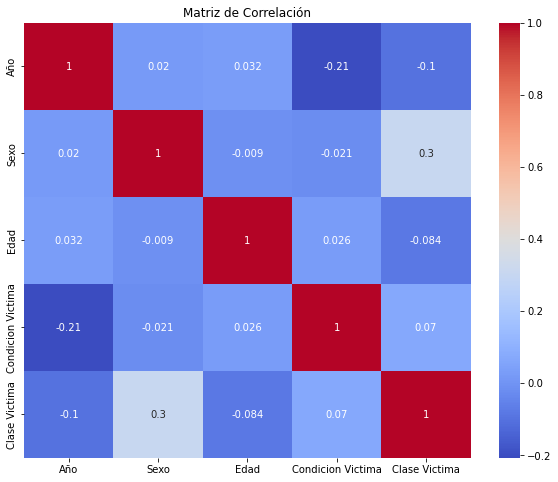

Media ajustada: 33.49572178749286
Desviación estándar ajustada: 15.409096709740604


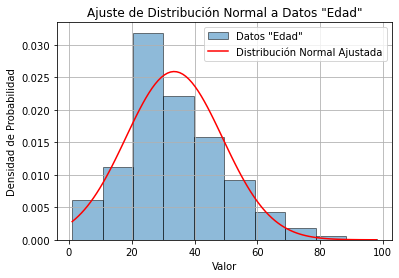

In [51]:
#BD4(VICTIMAS DE ACCIDENTES DE TRANSITO POR PROVINCIA) 
from sklearn.preprocessing import LabelEncoder

# Cargar los datos desde el archivo Excel
data = pd.read_excel("Victima Accidentes de Tránsito en Panama (provincia).xlsx")

# Eliminar filas con valores nulos en la columna "Edad"
data = data.dropna(subset=['Edad'])

# Seleccionar las columnas que deseas incluir en el DataFrame data_encoded
columns_to_include = ['Año', 'Sexo', 'Edad', 'Condicion Victima', 'Clase Victima']
data_encoded = data[columns_to_include].copy()

# Codificar las columnas categóricas utilizando Label Encoding
label_encoder = LabelEncoder()
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column].astype(str))

# Calcular la matriz de correlación entre todas las columnas (numéricas y codificadas)
correlation_matrix = data_encoded.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()




# Obtener la columna de interés para el ajuste de la distribución normal
edad = data['Edad']

# Ajustar una distribución normal a los datos de "Condicion Victima" utilizando máxima verosimilitud
mu, std = norm.fit(edad)

# Función de máxima verosimilitud para ajustar una distribución normal
def negative_log_likelihood(params):
    mu, std = params
    log_likelihood = -np.sum(norm.logpdf(edad, mu, std))
    return log_likelihood

# Ajustar la distribución normal utilizando máxima verosimilitud
result = minimize(negative_log_likelihood, [mu, std])
mu_fit, std_fit = result.x

# Imprimir los parámetros ajustados
print("Media ajustada:", mu_fit)
print("Desviación estándar ajustada:", std_fit)

# Crear un histograma de los datos de "Condicion Victima"
plt.hist(edad, bins=10, edgecolor='black', alpha=0.5, density=True, label='Datos "Edad"')

# Crear una línea que represente la distribución normal ajustada
x = np.linspace(min(edad), max(edad), 100)
y = norm.pdf(x, mu_fit, std_fit)
plt.plot(x, y, 'r-', label='Distribución Normal Ajustada')

plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución Normal a Datos "Edad"')
plt.legend()
plt.grid(True)
plt.show()



                            OLS Regression Results                            
Dep. Variable:                   Edad   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.84e-131
Time:                        17:39:38   Log-Likelihood:            -2.7253e+05
No. Observations:               65682   AIC:                         5.451e+05
Df Residuals:                   65677   BIC:                         5.451e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                31.6283      0.46

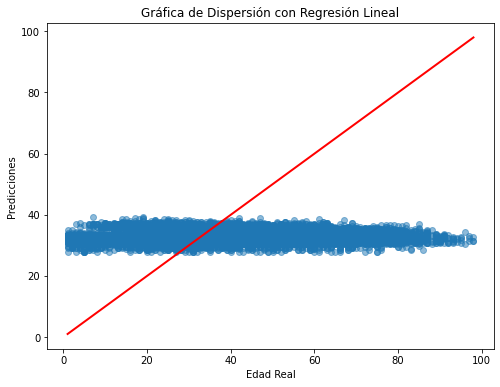

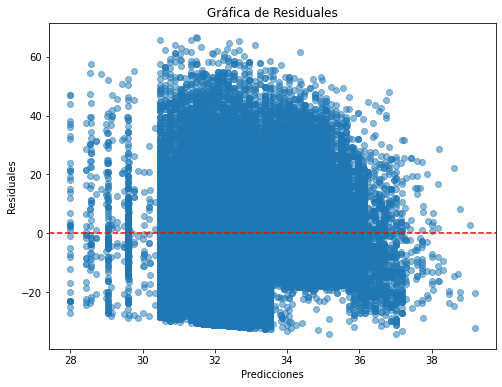

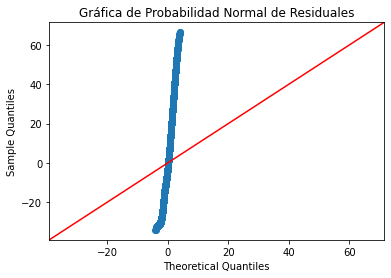


Tabla ANOVA:
<F test: F=153.87478853598662, p=2.844566314213748e-131, df_denom=6.57e+04, df_num=4>

R-cuadrado: 0.009284597231914438

Pruebas de t y valores de P:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            31.6283      0.461     68.568      0.000      30.724      32.532
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1453      0.019      7.590      0.000       0.108       0.183
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [55]:
#BD4(VICTIMAS DE ACCIDENTES DE TRANSITO POR PROVINCIA) 
import statsmodels.api as sm
# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = data_encoded.drop(columns=['Edad'])
y = data_encoded['Edad']

# Agregar una constante para el término independiente del modelo
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustar el modelo
results = model.fit()

# Imprimir los resultados
print(results.summary())

# Obtener las predicciones del modelo
y_pred = results.predict(X)


# Gráfica de dispersión de puntos con la regresión de la línea
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)
plt.xlabel('Edad Real')
plt.ylabel('Predicciones')
plt.title('Gráfica de Dispersión con Regresión Lineal')
plt.show()

# Gráfica de residuales
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfica de Residuales')
plt.show()

# Gráfica de probabilidad normal
sm.qqplot(residuals, line='45')
plt.title('Gráfica de Probabilidad Normal de Residuales')
plt.show()

# Tabla ANOVA
print("\nTabla ANOVA:")
print(results.f_test([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]))

# R-cuadrado
print("\nR-cuadrado:", results.rsquared)

# Pruebas de t y valores de P para coeficientes individuales
print("\nPruebas de t y valores de P:")
print(results.t_test([1, 0, 0, 0, 0]))
print(results.t_test([0, 1, 0, 0, 0]))
print(results.t_test([0, 0, 1, 0, 0]))
print(results.t_test([0, 0, 0, 1, 0]))
print(results.t_test([0, 0, 0, 0, 1]))

# Intervalos de confianza para coeficientes
print("\nIntervalos de confianza para coeficientes:")
print(results.conf_int())

# Valores de las constantes de la línea de regresión (interceptor y pendiente)
print("\nValores de las constantes de la línea de regresión:")
print("Intercept:", results.params[0])
print("Slope:", results.params[1:])


In [ ]:
---------------------------------------------------------------------------------------------------------------------------

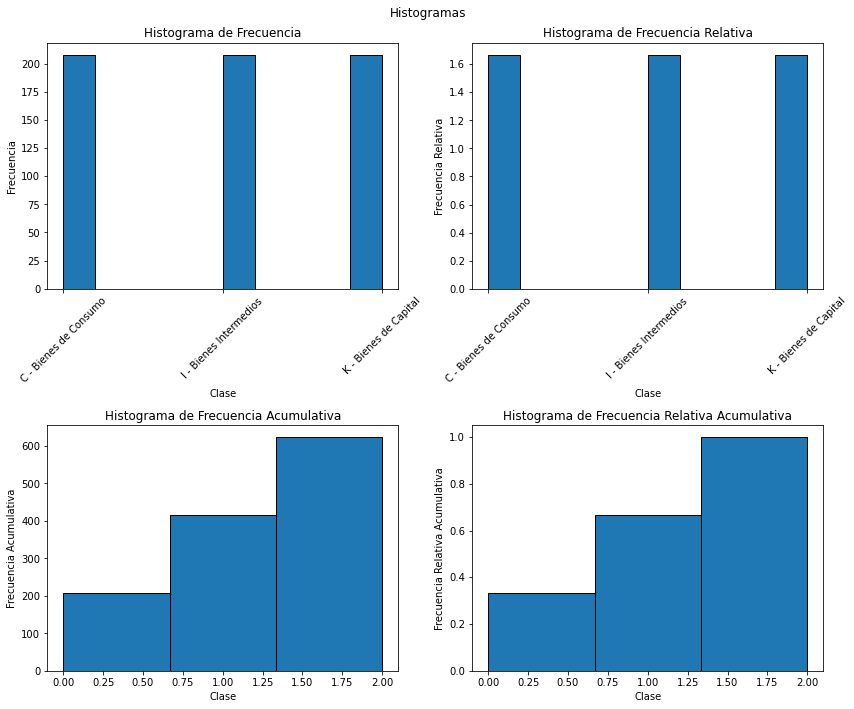

Media: 804036583.5576923
Varianza: 1.689471378170349e+17
Desviación Estándar: 411031796.6009867


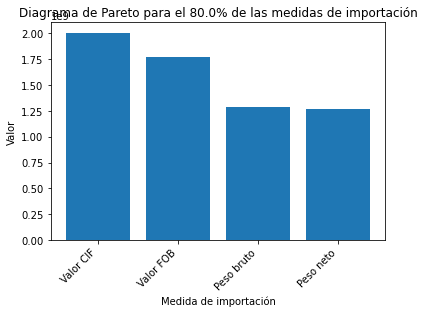

In [114]:
#BD6(Indicadores Económicos-Clasificación de Importaciones según el Uso o Destino Económico de los Bienes)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest, shapiro, ttest_ind
from sklearn.linear_model import LinearRegression

# Cargar los datos desde un archivo CSV o Excel
data = pd.read_excel('@Indicadores Económicos-Clasificación de Importaciones según el Uso o Destino Económico de los Bienes .xlsx')

# Obtener la columna de interés para los histogramas
columna =data['Clase'].astype(str)

# Crear la figura y los cuatro subplots para los histogramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histogramas')

# Histograma de frecuencia
axs[0, 0].hist(columna, edgecolor='black')
axs[0, 0].set_title('Histograma de Frecuencia')
axs[0, 0].set_xlabel('Clase')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].tick_params(axis='x', rotation=45)

# Histograma de frecuencia relativa
axs[0, 1].hist(columna, edgecolor='black', density=True)
axs[0, 1].set_title('Histograma de Frecuencia Relativa')
axs[0, 1].set_xlabel('Clase')
axs[0, 1].set_ylabel('Frecuencia Relativa')
axs[0, 1].tick_params(axis='x', rotation=45)

# Codificar la columna "Clase Victima" como valores numéricos
label_encoder = LabelEncoder()
columna_codificada = label_encoder.fit_transform(columna.astype(str))

# Histograma de frecuencia acumulativa
axs[1, 0].hist(columna_codificada, bins=len(label_encoder.classes_), edgecolor='black', cumulative=True)
axs[1, 0].set_title('Histograma de Frecuencia Acumulativa')
axs[1, 0].set_xlabel('Clase')
axs[1, 0].set_ylabel('Frecuencia Acumulativa')

# Histograma de frecuencia relativa acumulativa
axs[1, 1].hist(columna_codificada, bins=len(label_encoder.classes_), edgecolor='black', density=True, cumulative=True)
axs[1, 1].set_title('Histograma de Frecuencia Relativa Acumulativa')
axs[1, 1].set_xlabel('Clase')
axs[1, 1].set_ylabel('Frecuencia Relativa Acumulativa')

# Ajustar los espacios entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar la figura
plt.show()

# Media, varianza y desviación estándar de las medidas de importación
media = data['Valores de medidas'].mean()
varianza = data['Valores de medidas'].var()
desviacion_estandar = data['Valores de medidas'].std()
print(f'Media: {media}')
print(f'Varianza: {varianza}')
print(f'Desviación Estándar: {desviacion_estandar}')

# Diagrama de Pareto para un porcentaje (por ejemplo, 80%)
total_valores = len(data)
porcentaje = 0.8
data_sorted = data.sort_values(by='Valores de medidas', ascending=False)
data_sorted['cumulative_percentage'] = data_sorted['Valores de medidas'].cumsum() / data_sorted['Valores de medidas'].sum()
data_pareto = data_sorted[data_sorted['cumulative_percentage'] <= porcentaje]
plt.bar(data_pareto['Nombres de medidas'], data_pareto['Valores de medidas'])
plt.xlabel('Medida de importación')
plt.ylabel('Valor')
plt.title(f'Diagrama de Pareto para el {porcentaje * 100}% de las medidas de importación')
plt.xticks(rotation=45, ha='right')
plt.show()



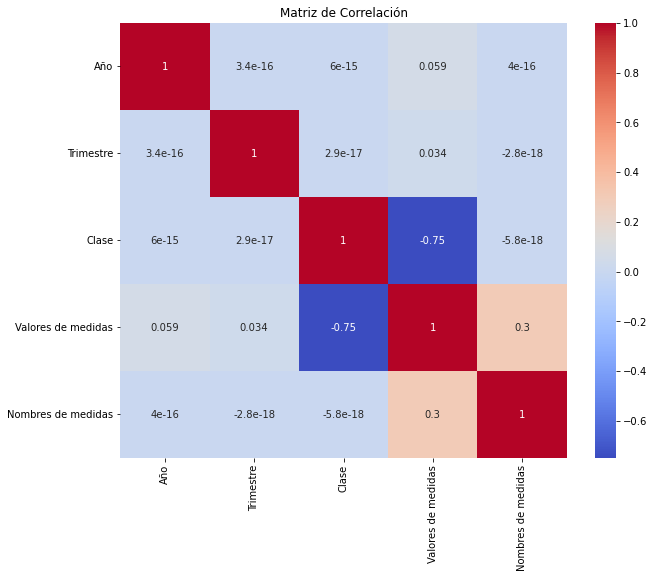

Media ajustada: 804036583.5576923
Desviación estándar ajustada: 410702312.14194363


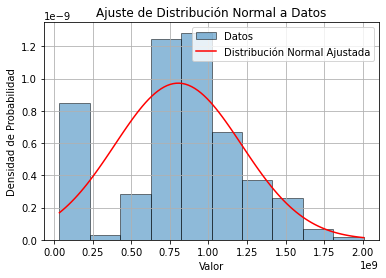

In [115]:
#BD6(Indicadores Económicos-Clasificación de Importaciones según el Uso o Destino Económico de los Bienes)
# Seleccionar las columnas que deseas incluir en el DataFrame data_encoded
columns_to_include = ['Año', 'Trimestre', 'Clase', 'Valores de medidas', 'Nombres de medidas']
data_encoded = data[columns_to_include].copy()

# Codificar las columnas categóricas utilizando Label Encoding
label_encoder = LabelEncoder()
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column].astype(str))

# Calcular la matriz de correlación entre todas las columnas (numéricas y codificadas)
correlation_matrix = data_encoded.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()




# Obtener la columna de interés para el ajuste de la distribución normal
co = data['Valores de medidas']

# Ajustar una distribución normal a los datos de "Condicion Victima" utilizando máxima verosimilitud
mu, std = norm.fit(co)

# Función de máxima verosimilitud para ajustar una distribución normal
def negative_log_likelihood(params):
    mu, std = params
    log_likelihood = -np.sum(norm.logpdf(co, mu, std))
    return log_likelihood

# Ajustar la distribución normal utilizando máxima verosimilitud
result = minimize(negative_log_likelihood, [mu, std])
mu_fit, std_fit = result.x

# Imprimir los parámetros ajustados
print("Media ajustada:", mu_fit)
print("Desviación estándar ajustada:", std_fit)

# Crear un histograma de los datos de "Condicion Victima"
plt.hist(co, bins=10, edgecolor='black', alpha=0.5, density=True, label='Datos')

# Crear una línea que represente la distribución normal ajustada
x = np.linspace(min(co), max(co), 100)
y = norm.pdf(x, mu_fit, std_fit)
plt.plot(x, y, 'r-', label='Distribución Normal Ajustada')

plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución Normal a Datos')
plt.legend()
plt.grid(True)
plt.show()




                            OLS Regression Results                            
Dep. Variable:     Valores de medidas   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     295.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          8.32e-142
Time:                        23:02:46   Log-Likelihood:                -12929.
No. Observations:                 624   AIC:                         2.587e+04
Df Residuals:                     619   BIC:                         2.589e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -1.2e+10   5.22

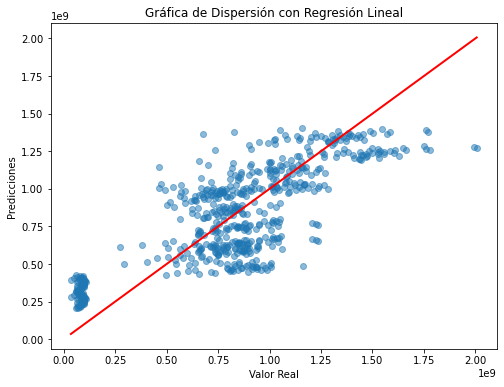

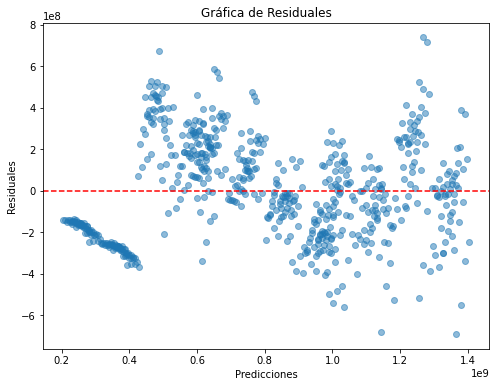

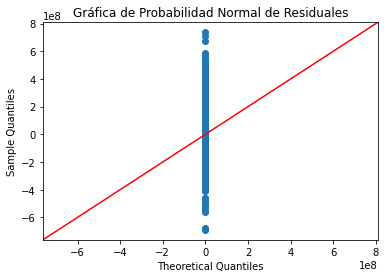


Tabla ANOVA:
<F test: F=294.9523458898949, p=8.317162791299655e-142, df_denom=619, df_num=4>

R-cuadrado: 0.6558834940169755

Pruebas de t y valores de P:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           -1.2e+10   5.22e+09     -2.301      0.022   -2.23e+10   -1.76e+09
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          6.448e+06   2.59e+06      2.492      0.013    1.37e+06    1.15e+07
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [116]:
import statsmodels.api as sm
# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = data_encoded.drop(columns=['Valores de medidas'])
y = data_encoded['Valores de medidas']

# Agregar una constante para el término independiente del modelo
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustar el modelo
results = model.fit()

# Imprimir los resultados
print(results.summary())

# Obtener las predicciones del modelo
y_pred = results.predict(X)


# Gráfica de dispersión de puntos con la regresión de la línea
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title('Gráfica de Dispersión con Regresión Lineal')
plt.show()

# Gráfica de residuales
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfica de Residuales')
plt.show()

# Gráfica de probabilidad normal
sm.qqplot(residuals, line='45')
plt.title('Gráfica de Probabilidad Normal de Residuales')
plt.show()

# Tabla ANOVA
print("\nTabla ANOVA:")
print(results.f_test([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]))

# R-cuadrado
print("\nR-cuadrado:", results.rsquared)

# Pruebas de t y valores de P para coeficientes individuales
print("\nPruebas de t y valores de P:")
print(results.t_test([1, 0, 0, 0, 0]))
print(results.t_test([0, 1, 0, 0, 0]))
print(results.t_test([0, 0, 1, 0, 0]))
print(results.t_test([0, 0, 0, 1, 0]))
print(results.t_test([0, 0, 0, 0, 1]))

# Intervalos de confianza para coeficientes
print("\nIntervalos de confianza para coeficientes:")
print(results.conf_int())

# Valores de las constantes de la línea de regresión (interceptor y pendiente)
print("\nValores de las constantes de la línea de regresión:")
print("Intercept:", results.params[0])
print("Slope:", results.params[1:])

In [ ]:
---------------------------------------------------------------------------------------------------------------------------

Media: 618096201.8571428
Varianza: 3.7578419980780805e+18
Desviación Estándar: 1938515410.843587


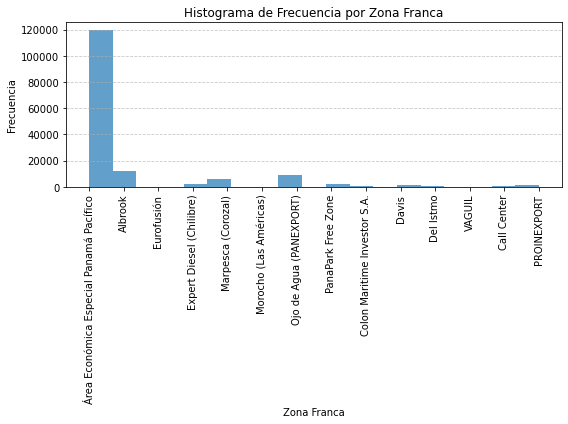

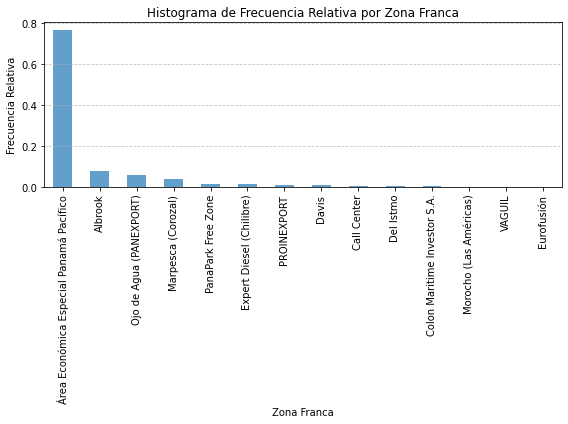

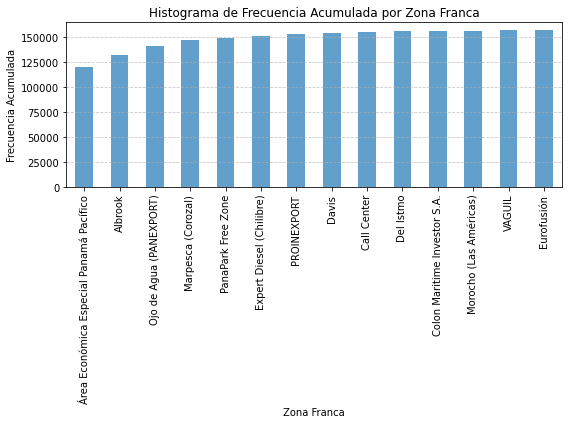

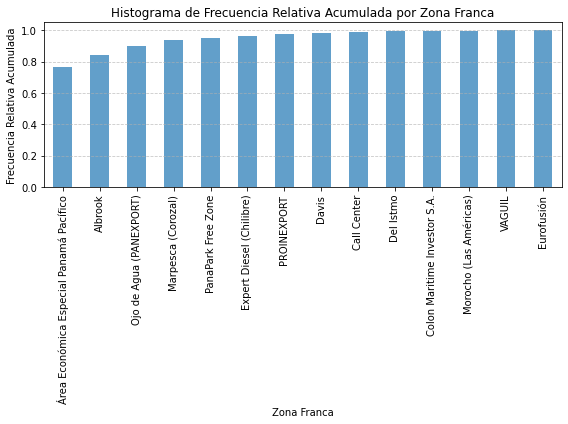

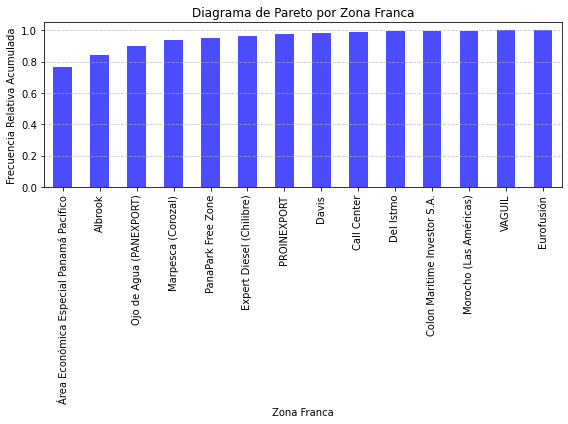

In [57]:
#BD5 (Importaciones por zona franca)
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un DataFrame
df = pd.read_excel('@Importaciones por zona franca (1).xlsx')  

# Media, varianza y desviación estándar de las importaciones por zona franca
importaciones_por_zona = df.groupby('Zonas Francas ')['Valor CIF'].sum()
media = importaciones_por_zona.mean()
varianza = importaciones_por_zona.var()
desviacion_estandar = importaciones_por_zona.std()
print('Media:', media)
print('Varianza:', varianza)
print('Desviación Estándar:', desviacion_estandar)


# Histograma de frecuencia
plt.figure(figsize=(8, 6))
plt.hist(df['Zonas Francas'], bins='auto', alpha=0.7)
plt.xlabel('Zona Franca')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia por Zona Franca')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histograma de frecuencia relativa
plt.figure(figsize=(8, 6))
total_observaciones = len(df)
frecuencia_relativa = df['Zonas Francas'].value_counts() / total_observaciones
frecuencia_relativa.plot(kind='bar', alpha=0.7)
plt.xlabel('Zona Franca')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencia Relativa por Zona Franca')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histograma de frecuencia acumulada
plt.figure(figsize=(8, 6))
frecuencia_acumulada = df['Zonas Francas'].value_counts().cumsum()
frecuencia_acumulada.plot(kind='bar', alpha=0.7)
plt.xlabel('Zona Franca')
plt.ylabel('Frecuencia Acumulada')
plt.title('Histograma de Frecuencia Acumulada por Zona Franca')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histograma de frecuencia relativa acumulada
plt.figure(figsize=(8, 6))
frecuencia_relativa_acumulada = frecuencia_acumulada / total_observaciones
frecuencia_relativa_acumulada.plot(kind='bar', alpha=0.7)
plt.xlabel('Zona Franca')
plt.ylabel('Frecuencia Relativa Acumulada')
plt.title('Histograma de Frecuencia Relativa Acumulada por Zona Franca')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Diagrama de Pareto
plt.figure(figsize=(8, 6))
frecuencia_pareto = frecuencia_relativa.cumsum()
frecuencia_pareto.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel('Zona Franca')
plt.ylabel('Frecuencia Relativa Acumulada')
plt.title('Diagrama de Pareto por Zona Franca')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



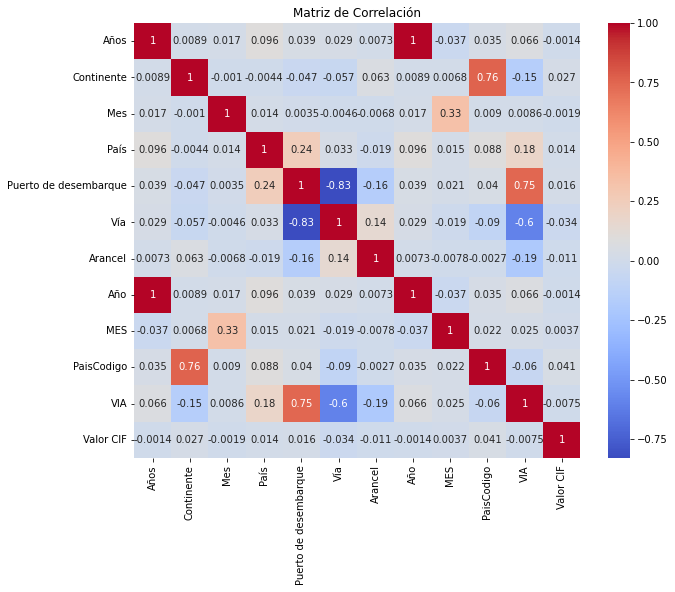

Media ajustada: 55298.95788040489
Desviación estándar ajustada: 270534.2413008823


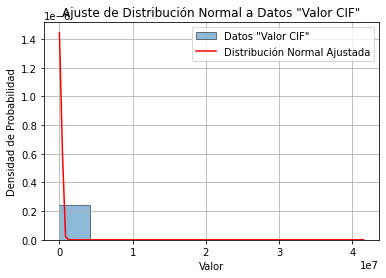

In [70]:
#BD5 (Importaciones por zona franca)
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

# Cargar los datos desde el archivo Excel
df = pd.read_excel('@Importaciones por zona franca (1).xlsx')

# Eliminar espacios en blanco al final de los nombres de las columnas
df.columns = df.columns.str.strip()

# Seleccionar las columnas que deseas incluir en el DataFrame data_encoded
columns_to_include = ['Años', 'Continente', 'Mes', 'País', 'Puerto de desembarque', 'Vía', 'Zonas Francas', 'Arancel', 'Año', 'MES', 'PaisCodigo', 'VIA', 'Zonas Francas', 'Valor CIF']
data_encoded = df[columns_to_include].copy()

# Codificar las columnas categóricas utilizando Label Encoding
label_encoder = LabelEncoder()
for column in data_encoded.columns:
    if pd.api.types.is_object_dtype(data_encoded[column]):
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column].astype(str))

# Calcular la matriz de correlación entre todas las columnas (numéricas y codificadas)
correlation_matrix = data_encoded.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Obtener la columna de interés para el ajuste de la distribución normal
co = df['Valor CIF']

# Ajustar una distribución normal a los datos de "Valor CIF" utilizando máxima verosimilitud
mu, std = norm.fit(co)

# Función de máxima verosimilitud para ajustar una distribución normal
def negative_log_likelihood(params):
    mu, std = params
    log_likelihood = -np.sum(norm.logpdf(co, mu, std))
    return log_likelihood

# Ajustar la distribución normal utilizando máxima verosimilitud
result = minimize(negative_log_likelihood, [mu, std])
mu_fit, std_fit = result.x

# Imprimir los parámetros ajustados
print("Media ajustada:", mu_fit)
print("Desviación estándar ajustada:", std_fit)

# Crear un histograma de los datos de "Valor CIF"
plt.hist(co, bins=10, edgecolor='black', alpha=0.5, density=True, label='Datos "Valor CIF"')

# Crear una línea que represente la distribución normal ajustada
x = np.linspace(min(co), max(co), 100)
y = norm.pdf(x, mu_fit, std_fit)
plt.plot(x, y, 'r-', label='Distribución Normal Ajustada')

plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución Normal a Datos "Valor CIF"')
plt.legend()
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:              Valor CIF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.649e+32
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:25:37   Log-Likelihood:             3.2141e+06
No. Observations:              156483   AIC:                        -6.428e+06
Df Residuals:                  156305   BIC:                        -6.426e+06
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

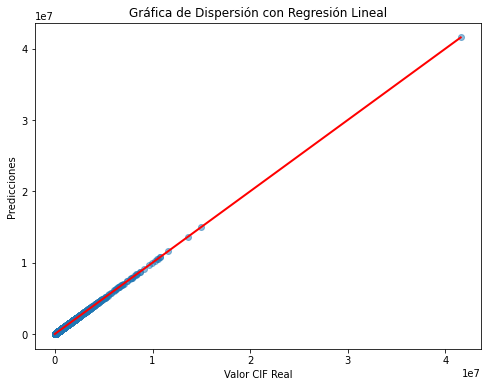

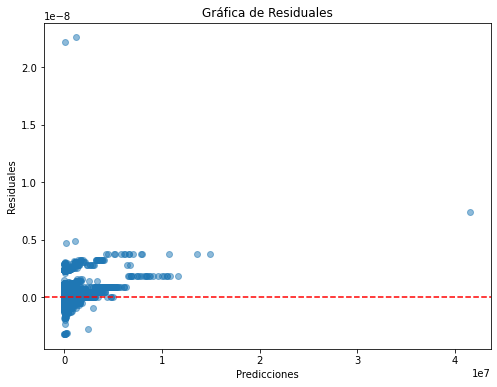

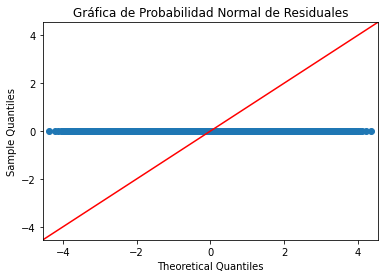


Análisis de Varianza (ANOVA):
Valor F: 7.563511914350016e+32
P-valor (F): 0.0

Pruebas de t y valores de P:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0         -1.414e-10   2.73e-11     -5.182      0.000   -1.95e-10   -8.79e-11
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0000   2.76e-18   3.62e+17      0.000       1.000       1.000

Intervalos de confianza para coeficientes:
                           0             1
const          -1.949137e-10 -8.793920e-11
Valor CIF       1.000000e+00  1.000000e+00
País _Albania   9.473268e-11  5.250880e-10
País _Alemania  3.570495e-10  4.046523e-10


In [90]:
#BD5 (Importaciones por zona franca)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos desde el archivo Excel
df = pd.read_excel('@Importaciones por zona franca (1).xlsx')

# Convertir la columna 'Pais' en variables dummy
dummies = pd.get_dummies(df['País '], prefix='País ')

# Convertir la columna 'VIA' en variables dummy
dummies_via = pd.get_dummies(df['VIA'], prefix='VIA')

# Combinar las variables dummy con el DataFrame original
df = pd.concat([df, dummies, dummies_via], axis=1)

# Regresión lineal con 'Valor CIF', variables dummy de 'Pais' y variables dummy de 'VIA'
X = df[['Valor CIF']+list(dummies.columns) + list(dummies_via.columns)]
y = df['Valor CIF']

X = sm.add_constant(X)  # Agregar una columna de unos para el término de intercepto
model = sm.OLS(y, X)
results = model.fit()

# Imprimir los resultados
print(results.summary())

# Obtener las predicciones del modelo
y_pred = results.predict(X)

# Gráfica de dispersión de puntos con la regresión de la línea
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)
plt.xlabel('Valor CIF Real')
plt.ylabel('Predicciones')
plt.title('Gráfica de Dispersión con Regresión Lineal')
plt.show()

# Gráfica de residuales
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfica de Residuales')
plt.show()

# Gráfica de probabilidad normal
sm.qqplot(residuals, line='45')
plt.title('Gráfica de Probabilidad Normal de Residuales')
plt.show()

# Análisis de varianza (ANOVA)
n = len(y)  # Tamaño de la muestra
k = X.shape[1] - 1  # Número de variables independientes (sin contar la constante)

# Suma de cuadrados del modelo
SSR = np.sum((y_pred - np.mean(y))**2)

# Suma de cuadrados de los residuos
SSE = np.sum(residuals**2)

# Suma de cuadrados total
SST = SSR + SSE

# Grados de libertad del modelo, residuos y total
df_model = k
df_resid = n - k - 1
df_total = n - 1
# Cuadrados medios
MSR = SSR / df_model
MSE = SSE / df_resid

# Valor F y valor de P
F = MSR / MSE
p_value = 1 - stats.f.cdf(F, df_model, df_resid)

print("\nAnálisis de Varianza (ANOVA):")
print(f"Valor F: {F}")
print(f"P-valor (F): {p_value}")
# Pruebas de t y valores de P para coeficientes individuales
print("\nPruebas de t y valores de P:")
print(results.t_test([1, 0] + [0]*len(dummies.columns) + [0]*len(dummies_via.columns)))
print(results.t_test([0, 1] + [0]*len(dummies.columns) + [0]*len(dummies_via.columns)))
# Repetir para las otras variables dummy y coeficientes

# Intervalos de confianza para coeficientes
print("\nIntervalos de confianza para coeficientes:")
print(results.conf_int())

# Valores de las constantes de la línea de regresión (interceptor y pendiente)
print("\nValores de las constantes de la línea de regresión:")
print("Intercept:", results.params[0])
print("Slope:", results.params[1:])




In [ ]:
----------------------------------------------------------------------------------------------------------------------------

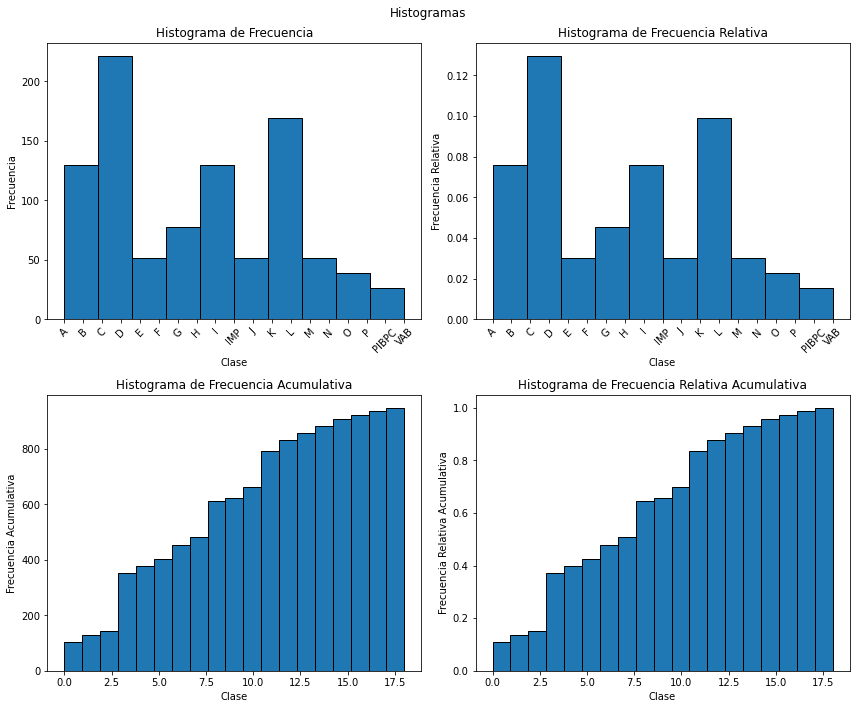

Media: 1911.9072708113797
Varianza: 61991661.76883948
Desviación Estándar: 7873.478378000379



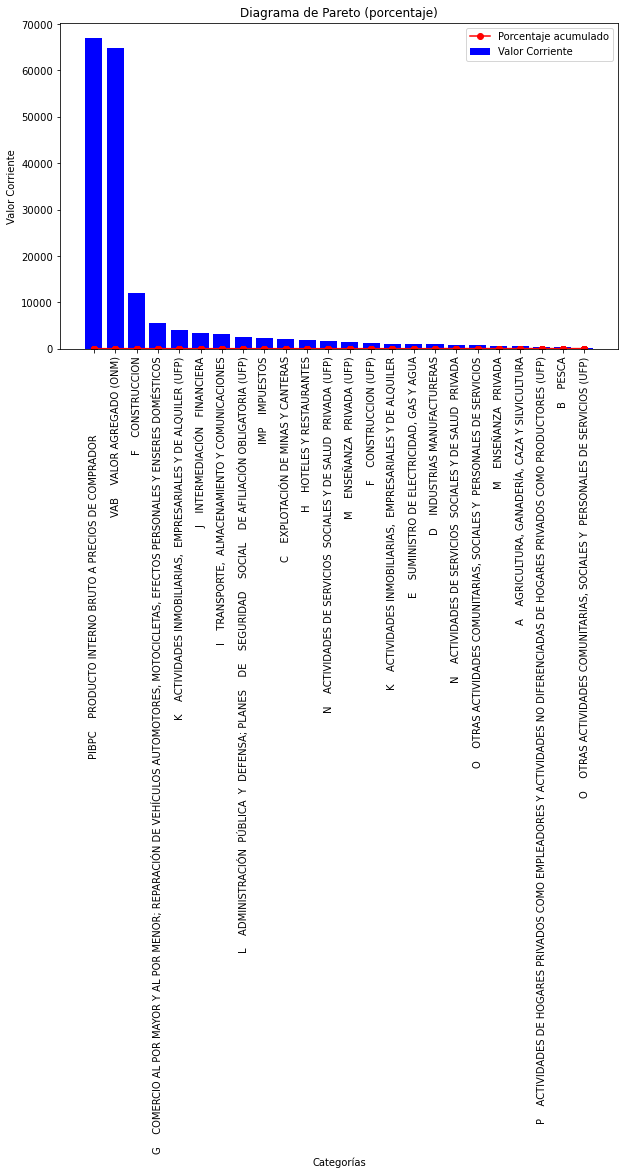

In [117]:
#BD7(PIB anual por categoria economica)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom, norm, linregress

# Leer el archivo de datos
df = pd.read_excel('PIB anual por categoria economica (1).xlsx') 
df=df.dropna()

# Obtener la columna de interés para los histogramas
columna =df['Codcategoria'].astype(str)

# Crear la figura y los cuatro subplots para los histogramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histogramas')

# Histograma de frecuencia
axs[0, 0].hist(columna, edgecolor='black')
axs[0, 0].set_title('Histograma de Frecuencia')
axs[0, 0].set_xlabel('Clase')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].tick_params(axis='x', rotation=45)

# Histograma de frecuencia relativa
axs[0, 1].hist(columna, edgecolor='black', density=True)
axs[0, 1].set_title('Histograma de Frecuencia Relativa')
axs[0, 1].set_xlabel('Clase')
axs[0, 1].set_ylabel('Frecuencia Relativa')
axs[0, 1].tick_params(axis='x', rotation=45)

# Codificar la columna "Clase Victima" como valores numéricos
label_encoder = LabelEncoder()
columna_codificada = label_encoder.fit_transform(columna.astype(str))

# Histograma de frecuencia acumulativa
axs[1, 0].hist(columna_codificada, bins=len(label_encoder.classes_), edgecolor='black', cumulative=True)
axs[1, 0].set_title('Histograma de Frecuencia Acumulativa')
axs[1, 0].set_xlabel('Clase')
axs[1, 0].set_ylabel('Frecuencia Acumulativa')

# Histograma de frecuencia relativa acumulativa
axs[1, 1].hist(columna_codificada, bins=len(label_encoder.classes_), edgecolor='black', density=True, cumulative=True)
axs[1, 1].set_title('Histograma de Frecuencia Relativa Acumulativa')
axs[1, 1].set_xlabel('Clase')
axs[1, 1].set_ylabel('Frecuencia Relativa Acumulativa')

# Ajustar los espacios entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar la figura
plt.show()

# Media, varianza y desviación estándar del Valor Corriente
media = df['Valor Corriente'].mean()
varianza = df['Valor Corriente'].var()
desviacion_estandar = df['Valor Corriente'].std()
print(f"Media: {media}\nVarianza: {varianza}\nDesviación Estándar: {desviacion_estandar}\n")

# Diagrama de Pareto (porcentaje)
df_sorted = df.sort_values('Valor Corriente', ascending=False)
df_sorted['acumulado_porcentaje'] = df_sorted['Valor Corriente'].cumsum() / df_sorted['Valor Corriente'].sum()

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Categorías'], df_sorted['Valor Corriente'], color='b')
plt.plot(df_sorted['Categorías'], df_sorted['acumulado_porcentaje'], color='r', marker='o')
plt.title('Diagrama de Pareto (porcentaje)')
plt.xlabel('Categorías')
plt.ylabel('Valor Corriente')
plt.xticks(rotation=90)
plt.legend(['Porcentaje acumulado', 'Valor Corriente'])
plt.show()




C:\Users\19546\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


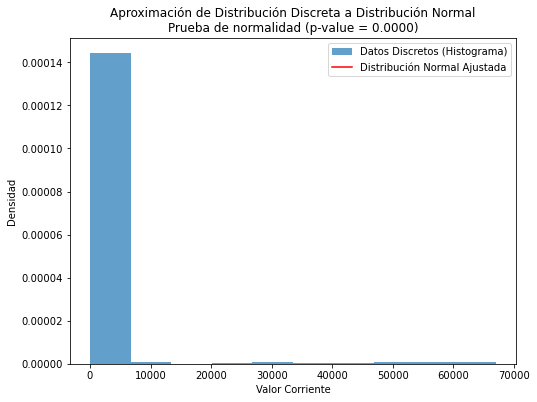

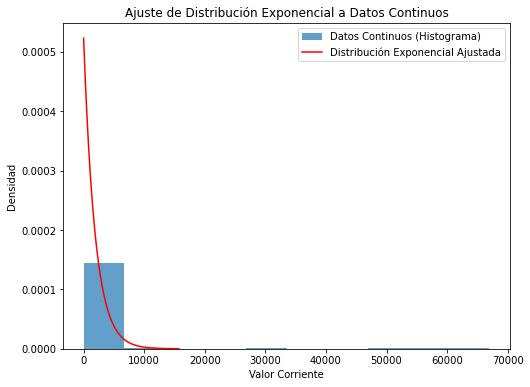

Prueba de ajuste (Kolmogorov-Smirnov)
Estadístico KS: 0.4379948543642723
Valor p: 3.432342021109436e-166


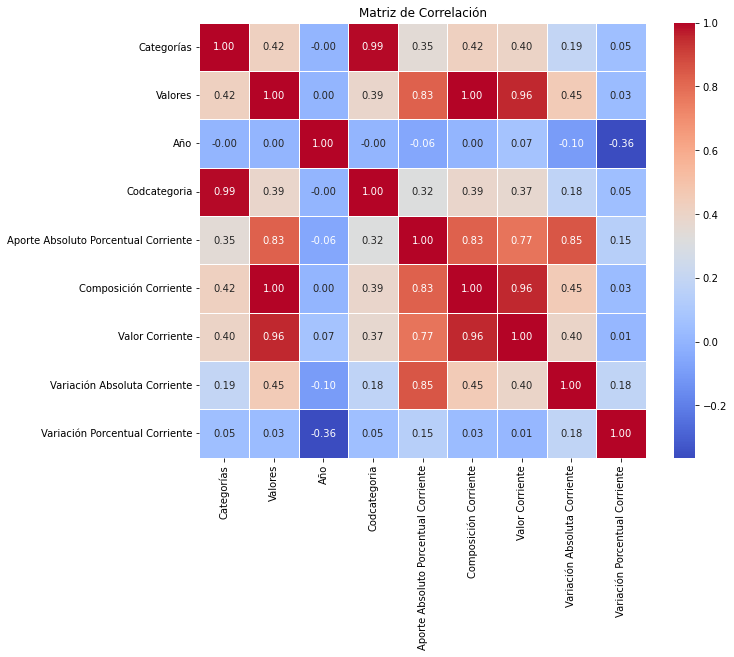

In [122]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Supongamos que la columna 'Valor Corriente' contiene los datos discretos (distribución binomial)
datos_discretos = df['Valor Corriente']

# Aproximación de la distribución binomial a una distribución normal mediante verosimilitud
# Se utiliza la media y varianza de la distribución binomial para aproximar una distribución normal
n = 50  # Tamaño de la muestra (parámetro de la distribución binomial)
p_hat = datos_discretos.mean() / n

# Asegurarse de que p_hat esté dentro del rango [0, 1]
p_hat = np.clip(p_hat, 0, 1)

# Suponiendo que la distribución discreta es binomial, obtenemos los parámetros de la distribución normal
mu_hat = n * p_hat
sigma_hat = np.sqrt(n * p_hat * (1 - p_hat))

# Generar datos simulados con una distribución normal ajustada
datos_simulados = np.random.normal(mu_hat, sigma_hat, size=len(datos_discretos))

# Gráfico de histograma de los datos discretos y curva de densidad de la distribución normal ajustada
plt.figure(figsize=(8, 6))
plt.hist(datos_discretos, bins=10, density=True, alpha=0.7, label='Datos Discretos (Histograma)')
plt.plot(np.sort(datos_simulados), stats.norm.pdf(np.sort(datos_simulados), mu_hat, sigma_hat), color='red', label='Distribución Normal Ajustada')

# Verificar normalidad con una prueba de normalidad (Shapiro-Wilk)
_, p_value = stats.shapiro(datos_discretos)
plt.title('Aproximación de Distribución Discreta a Distribución Normal\nPrueba de normalidad (p-value = {:.4f})'.format(p_value))
plt.xlabel('Valor Corriente')
plt.ylabel('Densidad')
plt.legend()
plt.show()


# Supongamos que la columna 'Valor Corriente' contiene los datos continuos que deseas analizar
datos_continuos = df['Valor Corriente']

# Ajustar la distribución exponencial a los datos
params = stats.expon.fit(datos_continuos)

# Obtener los parámetros de la distribución exponencial
loc, scale = params

# Generar datos simulados con una distribución exponencial ajustada
datos_simulados = stats.expon.rvs(loc=loc, scale=scale, size=len(datos_continuos))

# Gráfico de histograma de los datos continuos y curva de densidad de la distribución exponencial ajustada
plt.figure(figsize=(8, 6))
plt.hist(datos_continuos, bins=10, density=True, alpha=0.7, label='Datos Continuos (Histograma)')
plt.plot(np.sort(datos_simulados), stats.expon.pdf(np.sort(datos_simulados), loc=loc, scale=scale), color='red', label='Distribución Exponencial Ajustada')
plt.xlabel('Valor Corriente')
plt.ylabel('Densidad')
plt.title('Ajuste de Distribución Exponencial a Datos Continuos')
plt.legend()
plt.show()

# Prueba de ajuste (Kolmogorov-Smirnov)
ks_statistic, ks_p_value = stats.kstest(datos_continuos, 'expon', args=params)
print("Prueba de ajuste (Kolmogorov-Smirnov)")
print("Estadístico KS:", ks_statistic)
print("Valor p:", ks_p_value)


# Codificación de etiquetas para convertir columnas categóricas en numéricas
df_encoded = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Calcular la matriz de correlación
matriz_correlacion = df_encoded.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()



                            OLS Regression Results                            
Dep. Variable:                Valores   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2056.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          1.54e-239
Time:                        10:22:20   Log-Likelihood:                -3426.5
No. Observations:                 949   AIC:                             6857.
Df Residuals:                     947   BIC:                             6867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


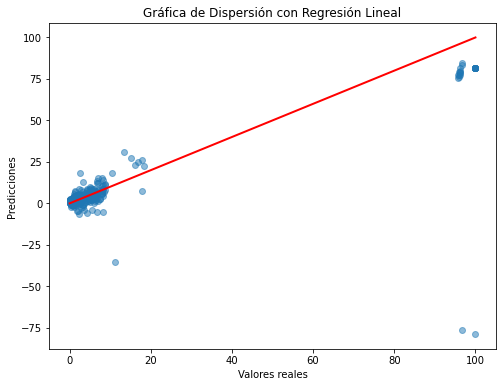

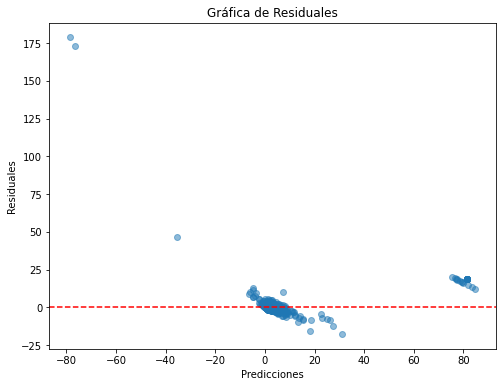

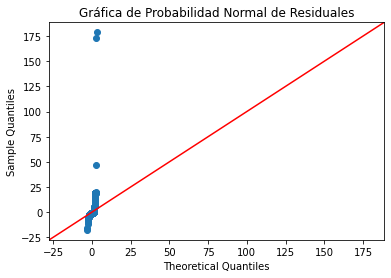

Intercepto: 1.2969092817285286
Pendiente: 0.8003952837219531
R cuadrado: 0.684628960067893

Tabla ANOVA para coeficientes:
<F test: F=2055.812180230212, p=1.5411303050765463e-239, df_denom=947, df_num=1>

Pruebas de t y valores de P:
Aporte Absoluto Porcentual Corriente:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.8004      0.018     45.341      0.000       0.766       0.835

Intervalos de confianza para coeficientes:
                                             0         1
const                                 0.713748  1.880070
Aporte Absoluto Porcentual Corriente  0.765752  0.835038

Valores de las constantes de la línea de regresión:
Intercept: 1.2969092817285286
Slope: Aporte Absoluto Porcentual Corriente    0.800395
dtype: float64


In [130]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


# Supongamos que tienes dos columnas 'Aporte Absoluto Porcentual Corriente' y 'Valores' para el análisis de regresión
X = df['Aporte Absoluto Porcentual Corriente']
y = df['Valores']

# Agregar una constante para el término independiente del modelo
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustar el modelo
results = model.fit()

# Imprimir los resultados
print(results.summary())

# Obtener las predicciones del modelo
y_pred = results.predict(X)

# Gráfica de dispersión de puntos con la regresión de la línea
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Dispersión con Regresión Lineal')
plt.show()

# Gráfica de residuales
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfica de Residuales')
plt.show()

# Gráfica de probabilidad normal
sm.qqplot(residuals, line='45')
plt.title('Gráfica de Probabilidad Normal de Residuales')
plt.show()

# Obtener las constantes de la línea de regresión (intercepto y pendiente)
intercepto, pendiente = results.params
print("Intercepto:", intercepto)
print("Pendiente:", pendiente)

# Obtener el R cuadrado
r_cuadrado = results.rsquared
print("R cuadrado:", r_cuadrado)

# Tabla ANOVA para coeficientes
contrast_matrix = np.eye(len(results.params))
contrast_matrix = contrast_matrix[1:]  # Eliminar la fila correspondiente al intercepto
anova_results = results.f_test(contrast_matrix)

# Imprimir la tabla ANOVA
print("\nTabla ANOVA para coeficientes:")
print(anova_results)

# Pruebas de t y valores de P para coeficientes individuales
print("\nPruebas de t y valores de P:")
for i, param in enumerate(results.params.index[1:]):
    t_test = results.t_test(np.eye(len(results.params))[1:][i])
    print(f"{param}:")
    print(t_test)

# Intervalos de confianza para coeficientes
print("\nIntervalos de confianza para coeficientes:")
print(results.conf_int())

# Valores de las constantes de la línea de regresión (interceptor y pendiente)
print("\nValores de las constantes de la línea de regresión:")
print("Intercept:", results.params[0])
print("Slope:", results.params[1:])


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

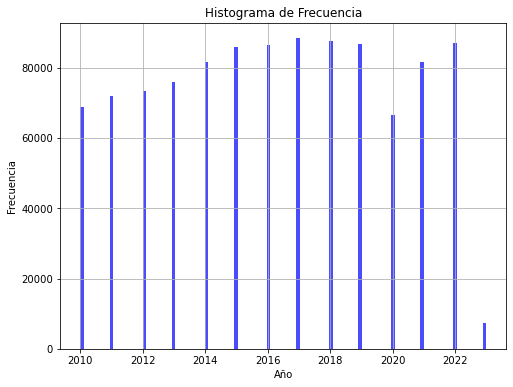

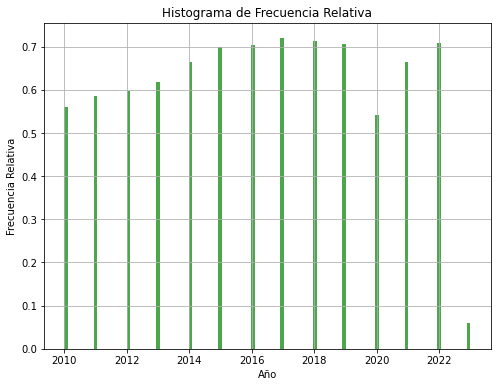

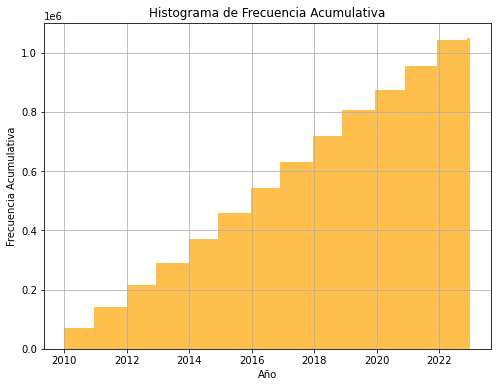

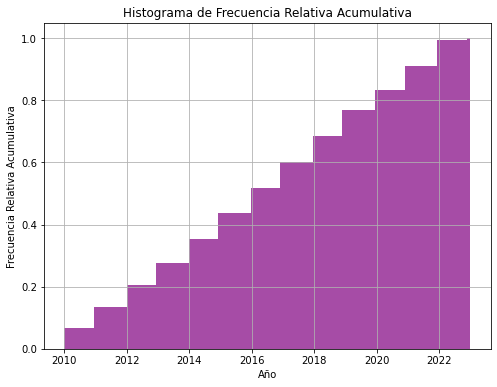

Media: 21594.165879407767
Varianza: 364856050731.78394
Desviación estándar: 604033.1536693858


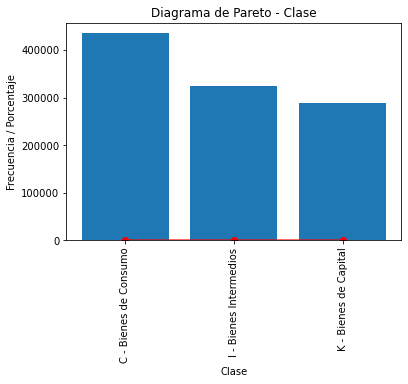

In [131]:
#BD8(Importaciones anuales)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde un archivo CSV
data = pd.read_excel('Trimestres y Meses_IE_T_IMPORTACIONES_ANUALES_data (1).xlsx')


# Obtener la columna "Año"
años = data['Año']

# Histograma de frecuencia
plt.figure(figsize=(8, 6))
plt.hist(años, bins='auto', color='blue', alpha=0.7)
plt.title('Histograma de Frecuencia')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Histograma de frecuencia relativa
plt.figure(figsize=(8, 6))
plt.hist(años, bins='auto', color='green', alpha=0.7, density=True)
plt.title('Histograma de Frecuencia Relativa')
plt.xlabel('Año')
plt.ylabel('Frecuencia Relativa')
plt.grid(True)
plt.show()

# Histograma de frecuencia acumulativa
plt.figure(figsize=(8, 6))
plt.hist(años, bins='auto', color='orange', alpha=0.7, cumulative=True)
plt.title('Histograma de Frecuencia Acumulativa')
plt.xlabel('Año')
plt.ylabel('Frecuencia Acumulativa')
plt.grid(True)
plt.show()

# Histograma de frecuencia relativa acumulativa
plt.figure(figsize=(8, 6))
plt.hist(años, bins='auto', color='purple', alpha=0.7, cumulative=True, density=True)
plt.title('Histograma de Frecuencia Relativa Acumulativa')
plt.xlabel('Año')
plt.ylabel('Frecuencia Relativa Acumulativa')
plt.grid(True)
plt.show()


# Media, varianza y desviación estándar
mean = data['Peso bruto'].mean()
variance = data['Peso bruto'].var()
std_deviation = data['Peso bruto'].std()
print('Media:', mean)
print('Varianza:', variance)
print('Desviación estándar:', std_deviation)

# Diagrama de Pareto
pareto_data = data['Clase'].value_counts().sort_values(ascending=False)
pareto_percentage = pareto_data.cumsum() / pareto_data.sum()

plt.bar(pareto_data.index, pareto_data)
plt.plot(pareto_data.index, pareto_percentage, color='r', marker='o')
plt.xlabel('Clase')
plt.ylabel('Frecuencia / Porcentaje')
plt.title('Diagrama de Pareto - Clase')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#la regresion lineal y transformacion a continuo de este documento se encuentra en otro notebook por problemas de memoria.

In [ ]:
----------------------------------------------------------------------------------------------------------------------------

Material_Calle   Evento                  
Asfalto          Vuelco (caída en cuneta)    131
                 Colisión                    130
                 Atropello                   125
                 Colisión y vuelco           115
                 Caída de persona o cosa     108
                 Colisión y atropello         80
                 Atropello y fuga             53
                 Atropello y colisión         36
                 Colisión con objeto fijo     32
                 Atropello y vuelco           28
                 Otros                        22
Concreto         Colisión                    114
                 Atropello                   101
                 Vuelco (caída en cuneta)     94
                 Colisión y vuelco            68
                 Caída de persona o cosa      59
                 Colisión y atropello         37
                 Colisión con objeto fijo     29
                 Atropello y colisión         21
                 Atropello 

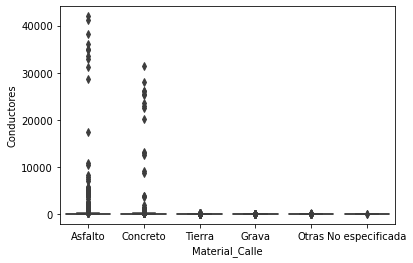

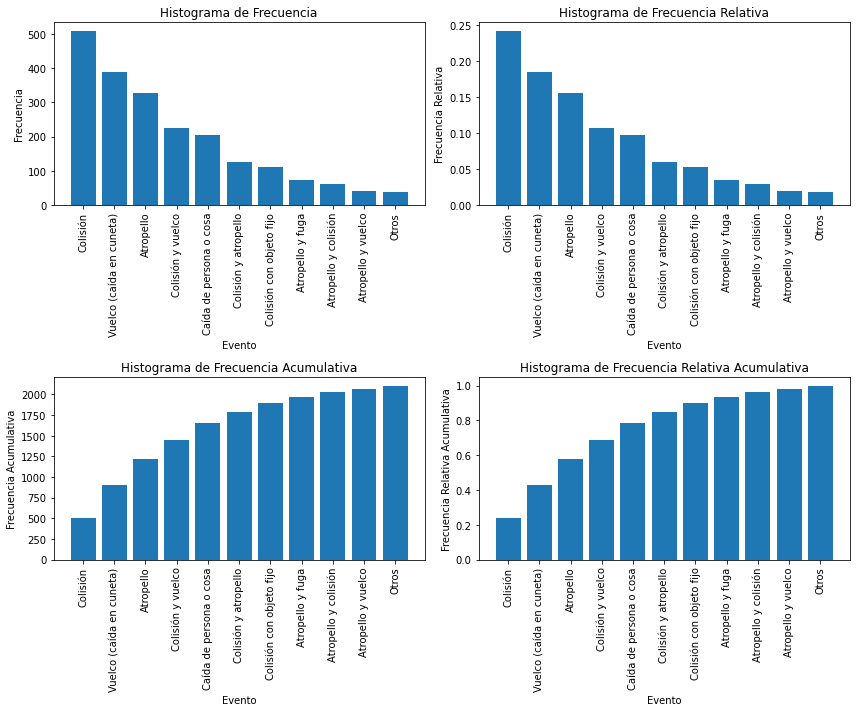

Media: 468.60095011876484
Varianza: 9807591.326424915
Desviación estándar: 3131.7074139237393


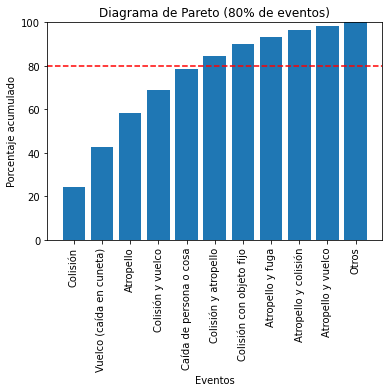

In [3]:
#BD1(Accidentes automovilísticos (conductores)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm
from sklearn.linear_model import LinearRegression

# Cargar los datos desde un archivo Excel
data = pd.read_excel('@Accidentes automovilísticos (conductores).xlsx')

# Eliminar las filas con valores nulos
data = data.dropna()

# Eventos más frecuentes dependiendo del material de la calle
eventos_por_material = data.groupby('Material_Calle')['Evento'].value_counts()
print(eventos_por_material)

# Relación entre el material de la calle y la gravedad de los accidentes
sns.boxplot(x='Material_Calle', y='Conductores', data=data)
plt.show()


# Calcular frecuencias de la columna "Evento"
frecuencias = data['Evento'].value_counts()

# Calcular frecuencias relativas de la columna "Evento"
frecuencias_relativas = data['Evento'].value_counts(normalize=True)

# Calcular frecuencias acumulativas de la columna "Evento"
frecuencias_acumulativas = frecuencias.cumsum()

# Calcular frecuencias relativas acumulativas de la columna "Evento"
frecuencias_relativas_acumulativas = frecuencias_relativas.cumsum()

# Generar los cuatro histogramas
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Evento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia')
plt.xticks(rotation='vertical') 


plt.subplot(2, 2, 2)
plt.bar(frecuencias_relativas.index, frecuencias_relativas.values)
plt.xlabel('Evento')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencia Relativa')
plt.xticks(rotation='vertical') 

plt.subplot(2, 2, 3)
plt.bar(frecuencias_acumulativas.index, frecuencias_acumulativas.values)
plt.xlabel('Evento')
plt.ylabel('Frecuencia Acumulativa')
plt.title('Histograma de Frecuencia Acumulativa')
plt.xticks(rotation='vertical') 

plt.subplot(2, 2, 4)
plt.bar(frecuencias_relativas_acumulativas.index, frecuencias_relativas_acumulativas.values)
plt.xlabel('Evento')
plt.ylabel('Frecuencia Relativa Acumulativa')
plt.title('Histograma de Frecuencia Relativa Acumulativa')
plt.xticks(rotation='vertical') 

plt.tight_layout()
plt.show()

# Media, varianza y desviación estándar de la variable 'Conductores'
media = data['Conductores'].mean()
varianza = data['Conductores'].var()
desviacion_estandar = data['Conductores'].std()
print("Media:", media)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion_estandar)

# Diagrama de Pareto para un porcentaje específico de eventos
porcentaje = 80
eventos_total = data['Evento'].value_counts().sort_values(ascending=False)
eventos_cumulativos = eventos_total.cumsum() / eventos_total.sum() * 100

plt.bar(eventos_cumulativos.index, eventos_cumulativos.values)
plt.ylabel('Porcentaje acumulado')
plt.xlabel('Eventos')
plt.title(f'Diagrama de Pareto ({porcentaje}% de eventos)')
plt.xticks(rotation=90)
plt.ylim([0, 100])
plt.axhline(y=porcentaje, color='r', linestyle='--')
plt.show()



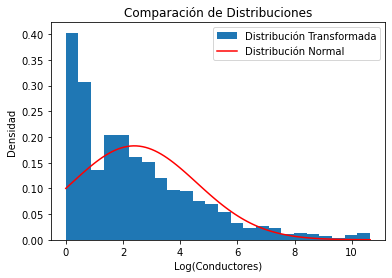

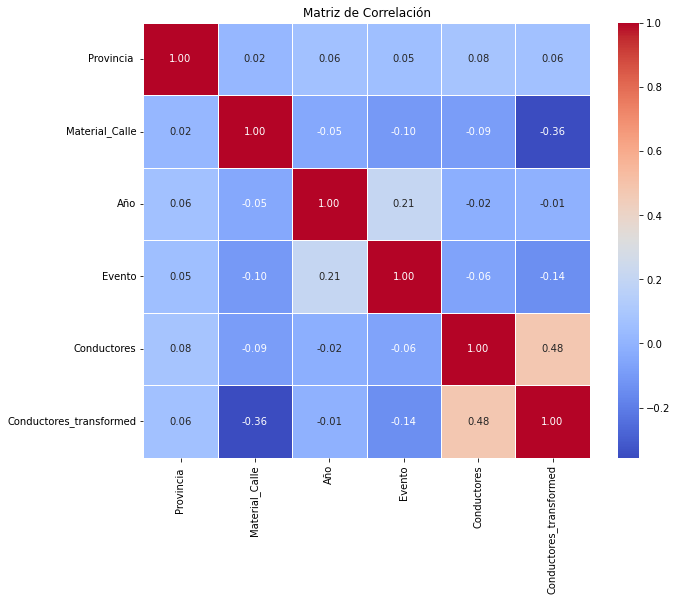

In [12]:
#BD1(Accidentes automovilísticos (conductores)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
# Aplicar la transformación logarítmica a la variable 'Conductores'
data['Conductores_transformed'] = np.log(data['Conductores'])
# Aproximación de la distribución binomial a una distribución normal
plt.hist(data['Conductores_transformed'], bins='auto', density=True, label='Distribución Transformada')

# Graficar la distribución normal superpuesta
x_normal = np.linspace(data['Conductores_transformed'].min(), data['Conductores_transformed'].max(), 100)
y_normal = norm.pdf(x_normal, np.mean(data['Conductores_transformed']), np.std(data['Conductores_transformed']))
plt.plot(x_normal, y_normal, 'r', label='Distribución Normal')

plt.xlabel('Log(Conductores)')
plt.ylabel('Densidad')
plt.title('Comparación de Distribuciones')
plt.legend()
plt.show()


# Codificación de etiquetas para convertir columnas categóricas en numéricas
df_encoded = data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Calcular la matriz de correlación
matriz_correlacion = df_encoded.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


Coeficientes:
const        30.722222
Asfalto     119.611111
Concreto     -8.722222
Grava       -28.722222
Otras       -26.722222
Tierra      -24.722222
dtype: float64

Intercepto:
30.722222222222193

R cuadrado:
0.28382237759565976

Tabla de coeficientes:


C:\Users\19546\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:            Conductores   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                 -0.432
Method:                 Least Squares   F-statistic:                    0.3963
Date:                Tue, 25 Jul 2023   Prob (F-statistic):              0.804
Time:                        16:27:21   Log-Likelihood:                -54.690
No. Observations:                   9   AIC:                             119.4
Df Residuals:                       4   BIC:                             120.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7222     48.106      0.639      0.5

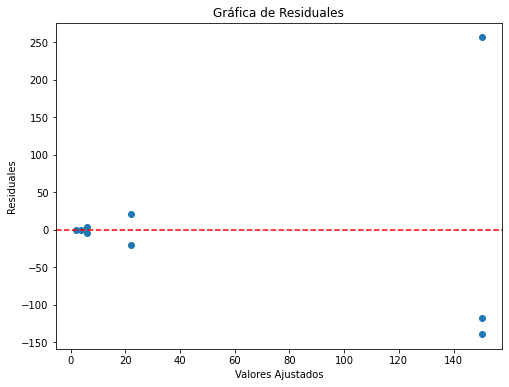

C:\Users\19546\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Prueba de normalidad (p-value):
0.014366894878093677


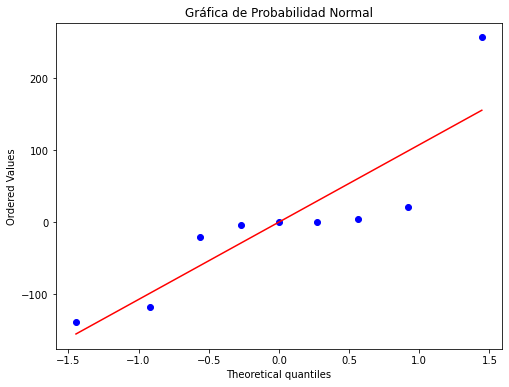

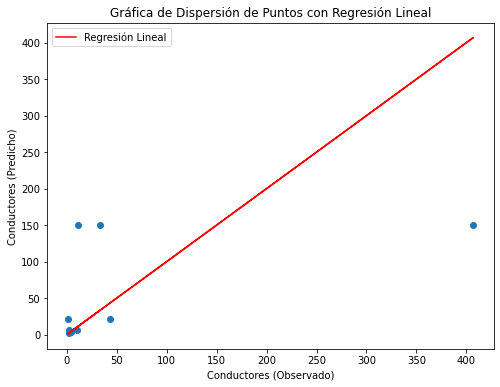


Prueba t (p-value):
0.9999999999999994

Prueba F (p-value):
1.0

Intervalos de confianza para los coeficientes:
                   0           1
const    -102.841298  164.285742
Asfalto  -126.667851  365.890073
Concreto -295.184059  277.739614
Grava    -411.189938  353.745494
Otras    -409.189938  355.745494
Tierra   -311.184059  261.739614


In [25]:
#BD1(Accidentes automovilísticos (conductores)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

data=data.dropna()

# Realizar one-hot encoding para la columna 'Material_Calle'
cod_material = pd.get_dummies(data['Material_Calle'])

# Variable dependiente (y): 'Conductores'
y = data['Conductores']

# Variable independiente (X): Agregar una columna de unos para el intercepto y usar la codificación de 'Material_Calle'
X = sm.add_constant(cod_material)

# Realizar la regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los resultados de la regresión
print("Coeficientes:")
print(model.params)
print("\nIntercepto:")
print(model.params[0])
print("\nR cuadrado:")
print(model.rsquared)
print("\nTabla de coeficientes:")
print(model.summary())

# Graficar la gráfica de residuales
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfica de Residuales')
plt.show()

# Realizar la prueba de normalidad en los residuales
_, p_value = stats.normaltest(model.resid)
print("\nPrueba de normalidad (p-value):")
print(p_value)

# Graficar la gráfica de probabilidad normal
plt.figure(figsize=(8, 6))
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Gráfica de Probabilidad Normal')
plt.show()

# Graficar la gráfica de dispersión de puntos con la regresión de la línea
plt.figure(figsize=(8, 6))
plt.scatter(y, model.fittedvalues)
plt.plot(y, y, 'r', label='Regresión Lineal')
plt.xlabel('Conductores (Observado)')
plt.ylabel('Conductores (Predicho)')
plt.title('Gráfica de Dispersión de Puntos con Regresión Lineal')
plt.legend()
plt.show()

# Realizar la prueba t
t_stat, t_p_value = stats.ttest_ind(y, model.fittedvalues)
print("\nPrueba t (p-value):")
print(t_p_value)

# Realizar la prueba F
f_stat, f_p_value = stats.f_oneway(y, model.fittedvalues)
print("\nPrueba F (p-value):")
print(f_p_value)

# Calcular intervalos de confianza para los coeficientes
conf_int = model.conf_int()
print("\nIntervalos de confianza para los coeficientes:")
print(conf_int)


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

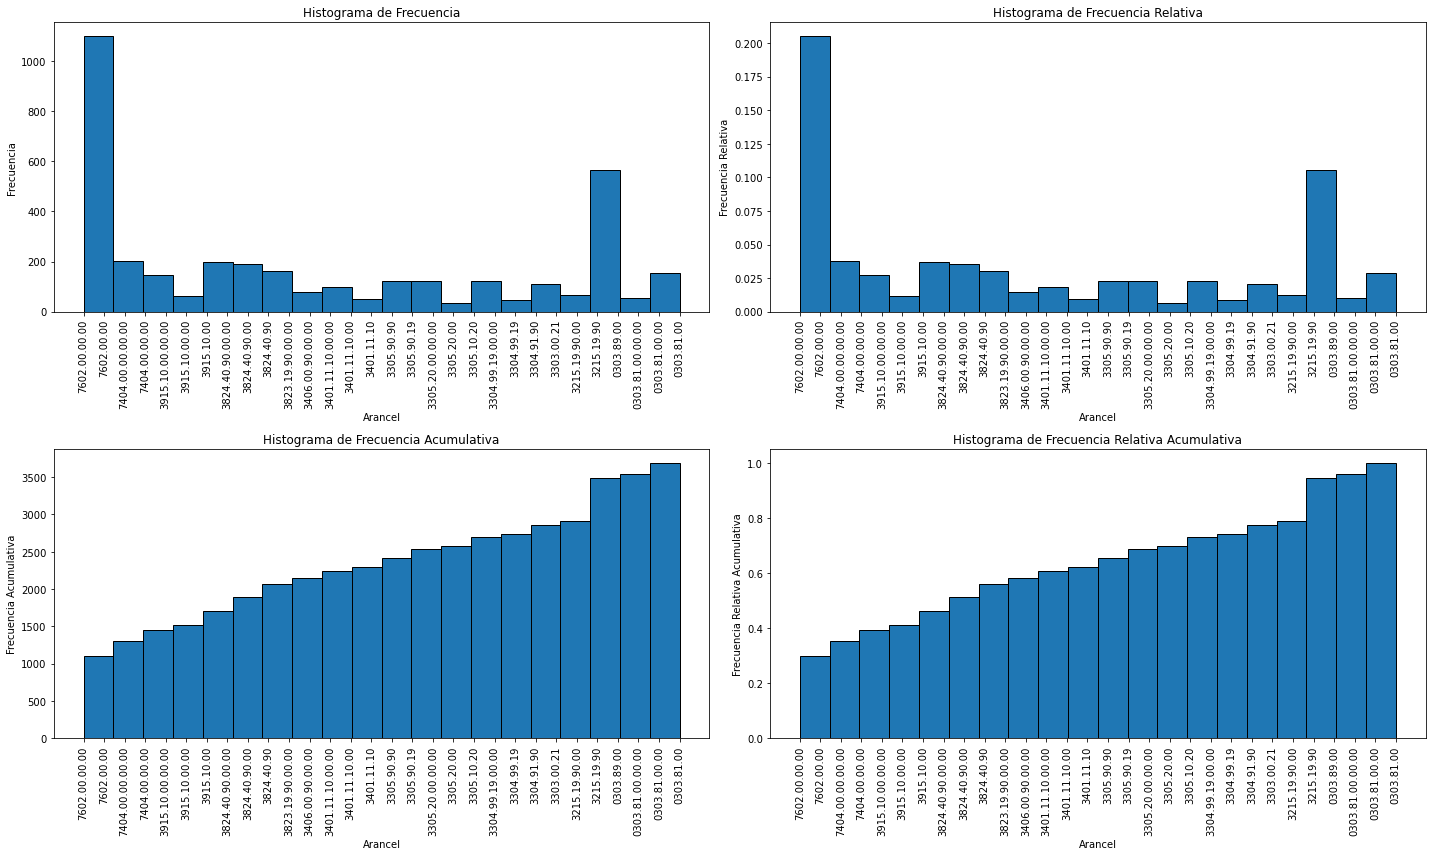

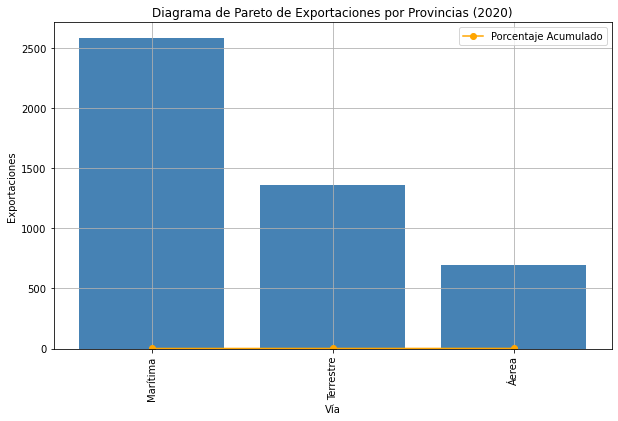

In [30]:
#BD2(Exportaciones por aranceles)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols

df = pd.read_excel("@Exportaciones por aranceles (2).xlsx")

# Seleccionar el rango de filas deseado utilizando iloc
df_2020 = df.iloc[65171:69808].copy()


# Obtener los 20 aranceles más importantes
top_20_aranceles = df_2020["Arancel"].value_counts().nlargest(30).index

# Filtrar el DataFrame para incluir solo los 20 aranceles más importantes
df_top_20_aranceles = df_2020[df_2020["Arancel"].isin(top_20_aranceles)]

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Histograma de frecuencia
axs[0, 0].hist(df_top_20_aranceles["Arancel"], bins=20, edgecolor='black')
axs[0, 0].set_xlabel("Arancel")
axs[0, 0].set_ylabel("Frecuencia")
axs[0, 0].set_title("Histograma de Frecuencia")
axs[0, 0].tick_params(axis='x', rotation=90)

# Histograma de frecuencia relativa
axs[0, 1].hist(df_top_20_aranceles["Arancel"], bins=20, density=True, edgecolor='black')
axs[0, 1].set_xlabel("Arancel")
axs[0, 1].set_ylabel("Frecuencia Relativa")
axs[0, 1].set_title("Histograma de Frecuencia Relativa")
axs[0, 1].tick_params(axis='x', rotation=90)

# Histograma de frecuencia acumulativa
axs[1, 0].hist(df_top_20_aranceles["Arancel"], bins=20, cumulative=True, density=False, edgecolor='black')
axs[1, 0].set_xlabel("Arancel")
axs[1, 0].set_ylabel("Frecuencia Acumulativa")
axs[1, 0].set_title("Histograma de Frecuencia Acumulativa")
axs[1, 0].tick_params(axis='x', rotation=90)

# Histograma de frecuencia relativa acumulativa
axs[1, 1].hist(df_top_20_aranceles["Arancel"], bins=20, cumulative=True, density=True, edgecolor='black')
axs[1, 1].set_xlabel("Arancel")
axs[1, 1].set_ylabel("Frecuencia Relativa Acumulativa")
axs[1, 1].set_title("Histograma de Frecuencia Relativa Acumulativa")
axs[1, 1].tick_params(axis='x', rotation=90)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#timeline de exortaciones en el 2020
df["Mes"] = pd.Categorical(df["Mes"], ordered=True, categories=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])


#diagrama de pareto de las provincias
provincias_counts = df_2020["Vía"].value_counts().sort_values(ascending=False)
provincias_cumulative_percentage = provincias_counts.cumsum() / provincias_counts.sum()

plt.figure(figsize=(10, 6))
plt.bar(provincias_counts.index, provincias_counts.values, color="steelblue")
plt.plot(provincias_cumulative_percentage, color="orange", marker="o", linestyle="-")
plt.xticks(rotation=90)
plt.xlabel("Vía")
plt.ylabel("Exportaciones")
plt.title("Diagrama de Pareto de Exportaciones por Provincias (2020)")
plt.legend(["Porcentaje Acumulado"])
plt.grid(True)
plt.show()



Media: 208587.90752205253
Varianza: 6499566378109.796
Desviación Estándar: 2549424.7151288455


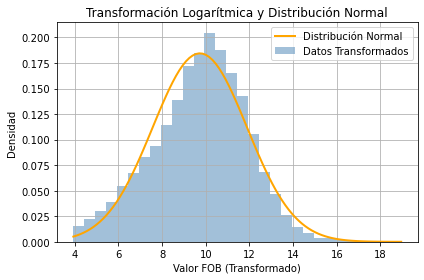

In [83]:
#BD2(Exportaciones por aranceles)
valor_fob = df["Valor FOB"]

media = np.mean(valor_fob)
varianza = np.var(valor_fob)
desviacion_estandar = np.std(valor_fob)

print("Media:", media)
print("Varianza:", varianza)
print("Desviación Estándar:", desviacion_estandar)


# Transformación logarítmica
valor_fob_transformado = np.log(valor_fob)

# Ajuste de la distribución normal
mu, sigma = stats.norm.fit(valor_fob_transformado)

# Crear el histograma con los datos transformados
plt.hist(valor_fob_transformado, bins=30, density=True, alpha=0.5, color="steelblue")

# Crear la línea de la distribución normal
x = np.linspace(valor_fob_transformado.min(), valor_fob_transformado.max(), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color="orange", linewidth=2)

# Configuración del gráfico
plt.xlabel("Valor FOB (Transformado)")
plt.ylabel("Densidad")
plt.title("Transformación Logarítmica y Distribución Normal")
plt.legend(["Distribución Normal", "Datos Transformados"])
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


                            OLS Regression Results                            
Dep. Variable:              Valor FOB   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     254.7
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.93e-57
Time:                        17:25:00   Log-Likelihood:            -1.3032e+06
No. Observations:               80603   AIC:                         2.607e+06
Df Residuals:                   80601   BIC:                         2.607e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.703e+07   4.84e+06    -15.918      0.0

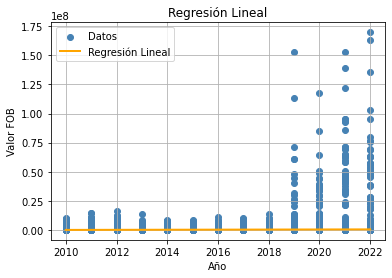

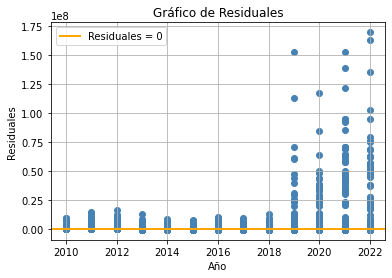

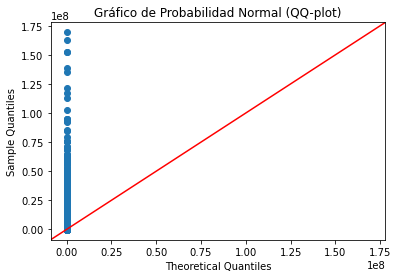

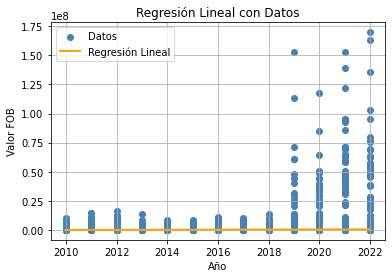

Estadística chi-cuadrado: 5905541.295915275
Valor p: 1.0


In [33]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats

# Variable dependiente
y = df["Valor FOB"]

# Variable independiente
X = df[["Año"]]  # Puedes agregar más variables independientes si es necesario

# Agregar una constante a X para incluir el término de intersección en el modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener los resultados y estadísticas del modelo
print(modelo.summary())

# Extraer los valores de las constantes de la línea de regresión (intercepto y pendiente)
intercepto = modelo.params[0]
pendiente = modelo.params[1]

# Intervalos de confianza para el intercepto y la pendiente
intervalo_conf_intercepto = modelo.conf_int().loc["const"]
intervalo_conf_pendiente = modelo.conf_int().loc["Año"]

print("Intervalo de confianza para el intercepto:")
print(intervalo_conf_intercepto)
print("Intervalo de confianza para la pendiente:")
print(intervalo_conf_pendiente)

# Gráfico de regresión lineal
plt.scatter(df["Año"], df["Valor FOB"], color="steelblue", label="Datos")
plt.plot(df["Año"], modelo.predict(X), color="orange", linewidth=2, label="Regresión Lineal")
plt.xlabel("Año")
plt.ylabel("Valor FOB")
plt.title("Regresión Lineal")
plt.legend()
plt.grid(True)
plt.show()

# Obtener los residuales del modelo
residuales = modelo.resid

# Gráfico de residuales
plt.scatter(df["Año"], residuales, color="steelblue")
plt.axhline(y=0, color="orange", linewidth=2, label="Residuales = 0")
plt.xlabel("Año")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de probabilidad normal (QQ-plot)
sm.qqplot(residuales, line="45")
plt.title("Gráfico de Probabilidad Normal (QQ-plot)")
plt.show()

# Gráfico de dispersión de puntos con la regresión de la línea
plt.scatter(df["Año"], df["Valor FOB"], color="steelblue", label="Datos")
plt.plot(df["Año"], modelo.predict(X), color="orange", linewidth=2, label="Regresión Lineal")
plt.xlabel("Año")
plt.ylabel("Valor FOB")
plt.title("Regresión Lineal con Datos")
plt.legend()
plt.grid(True)
plt.show()

# Prueba estadística chi-cuadrado
contingencia = pd.crosstab(df["Codigopais"], df["Valor FOB"])
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingencia)
print("Estadística chi-cuadrado:", chi2_statistic)
print("Valor p:", p_value)


In [ ]:
---------------------------------------------------------------------------------------------------------------------------

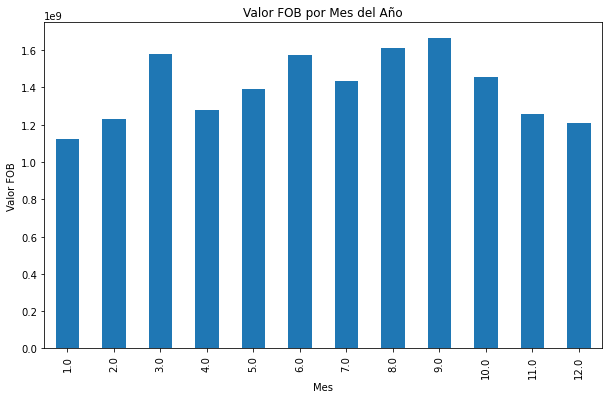

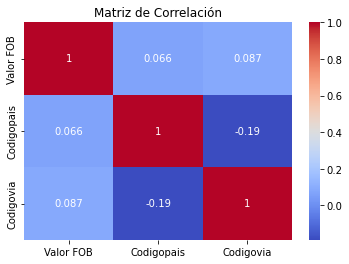

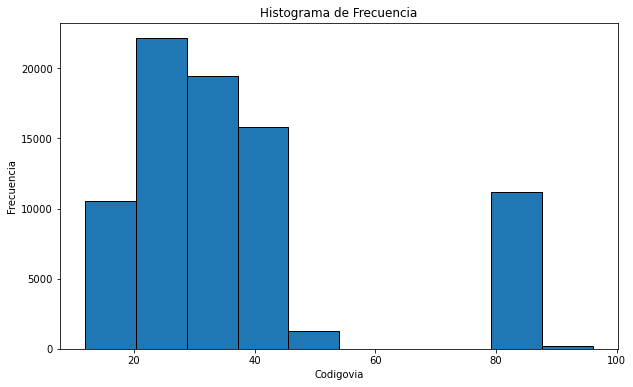

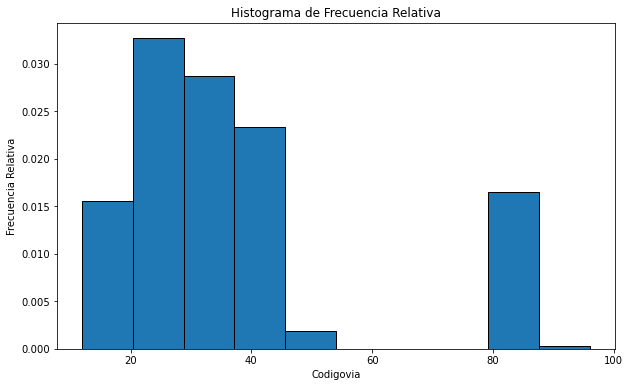

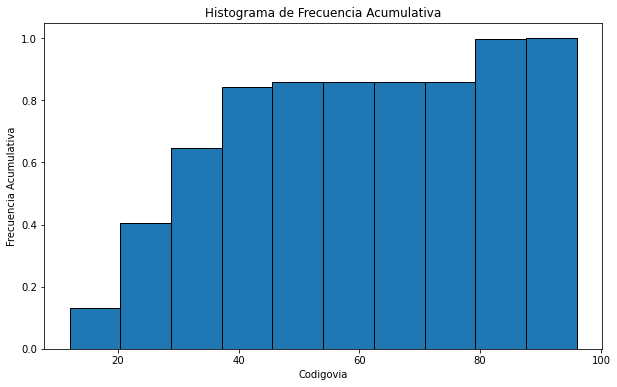

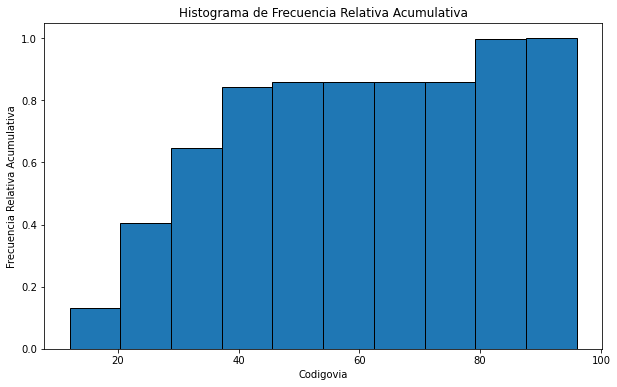

Media: 208463.63011627042
Varianza: 6493959025845.377
Desviación Estándar: 2548324.748897867


In [34]:
#BD3(Exportaciones por paises)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar los datos desde un archivo excel
data = pd.read_excel('@Exportaciones por países .xlsx')

# Gráfico de barras para el valor FOB por mes del año
plt.figure(figsize=(10, 6))
monthly_fob = data.groupby(data['MES'])['Valor FOB'].sum()
monthly_fob.plot(kind='bar')
plt.title('Valor FOB por Mes del Año')
plt.xlabel('Mes')
plt.ylabel('Valor FOB')
plt.show()


# Explorar correlaciones entre variables
correlation_matrix = data[['Valor FOB', 'Mes', 'Codigopais', 'Codigovia']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


# Crear el histograma de frecuencia
plt.figure(figsize=(10, 6))
plt.hist(data['Codigovia'], bins=10, edgecolor='black')
plt.title('Histograma de Frecuencia')
plt.xlabel('Codigovia')
plt.ylabel('Frecuencia')
plt.show()

# Crear el histograma de frecuencia relativa
plt.figure(figsize=(10, 6))
plt.hist(data['Codigovia'], bins=10, density=True, edgecolor='black')
plt.title('Histograma de Frecuencia Relativa')
plt.xlabel('Codigovia')
plt.ylabel('Frecuencia Relativa')
plt.show()

# Crear el histograma de frecuencia acumulativa
plt.figure(figsize=(10, 6))
plt.hist(data['Codigovia'], bins=10, cumulative=True, density=True, edgecolor='black')
plt.title('Histograma de Frecuencia Acumulativa')
plt.xlabel('Codigovia')
plt.ylabel('Frecuencia Acumulativa')
plt.show()

# Crear el histograma de frecuencia relativa acumulativa
plt.figure(figsize=(10, 6))
plt.hist(data['Codigovia'], bins=10, cumulative=True, density=True, edgecolor='black')
plt.title('Histograma de Frecuencia Relativa Acumulativa')
plt.xlabel('Codigovia')
plt.ylabel('Frecuencia Relativa Acumulativa')
plt.show()


# Media, varianza y desviación estándar
mean_fob = data['Valor FOB'].mean()
var_fob = data['Valor FOB'].var()
std_fob = data['Valor FOB'].std()
print('Media:', mean_fob)
print('Varianza:', var_fob)
print('Desviación Estándar:', std_fob)



Pendiente: 8.209137155614173e-08
Intercepto: 2015.504504804134
Coeficiente de Correlación: 0.05597180404319003
Valor p: 5.40204232671267e-57
Error estándar: 5.155673883742007e-09
Intervalo de confianza para la pendiente: (7.198628481604866e-08, 9.21964582962348e-08)
Intervalo de confianza para el intercepto: (2015.504504794029, 2015.5045048142392)


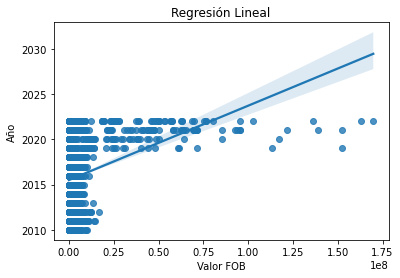

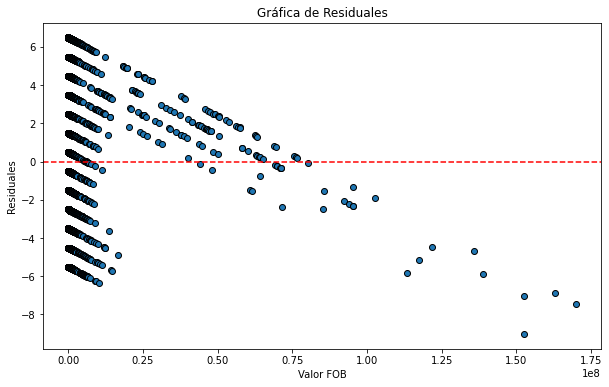

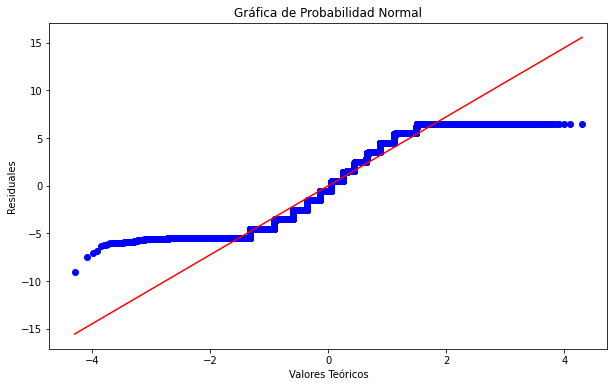

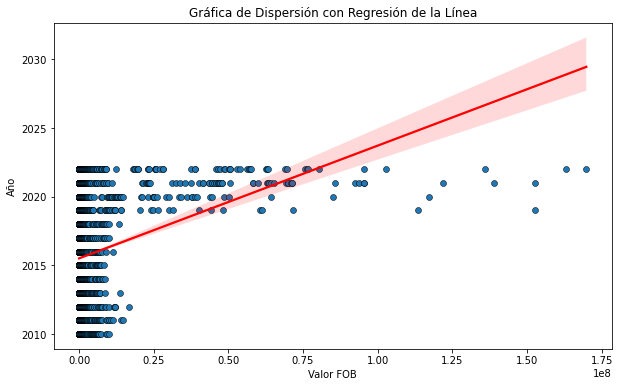

In [37]:
#BD3(Exportaciones por paises)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Realizar la regresión lineal entre el Valor FOB y el Año
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Valor FOB'], data['Año'])
print('Pendiente:', slope)
print('Intercepto:', intercept)
print('Coeficiente de Correlación:', r_value)
print('Valor p:', p_value)
print('Error estándar:', std_err)

# Intervalos de confianza para la pendiente e intercepto
conf_int_slope = stats.t.interval(0.95, len(data['Valor FOB'])-2, loc=slope, scale=std_err)
conf_int_intercept = stats.t.interval(0.95, len(data['Valor FOB'])-2, loc=intercept, scale=std_err)

print('Intervalo de confianza para la pendiente:', conf_int_slope)
print('Intervalo de confianza para el intercepto:', conf_int_intercept)

# Realizar un gráfico de dispersión con una línea de regresión lineal
sns.regplot(x='Valor FOB', y='Año', data=data)
plt.title('Regresión Lineal')
plt.xlabel('Valor FOB')
plt.ylabel('Año')
plt.show()

# Gráfica de residuales
residuales = data['Año'] - (slope * data['Valor FOB'] + intercept)
plt.figure(figsize=(10, 6))
plt.scatter(data['Valor FOB'], residuales, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfica de Residuales')
plt.xlabel('Valor FOB')
plt.ylabel('Residuales')
plt.show()

# Gráfica de probabilidad normal
plt.figure(figsize=(10, 6))
stats.probplot(residuales, plot=plt)
plt.title('Gráfica de Probabilidad Normal')
plt.xlabel('Valores Teóricos')
plt.ylabel('Residuales')
plt.show()

# Gráfica de dispersión de puntos con la regresión de la línea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor FOB', y='Año', data=data, edgecolor='black')
sns.regplot(x='Valor FOB', y='Año', data=data, scatter=False, color='red')
plt.title('Gráfica de Dispersión con Regresión de la Línea')
plt.xlabel('Valor FOB')
plt.ylabel('Año')
plt.show()


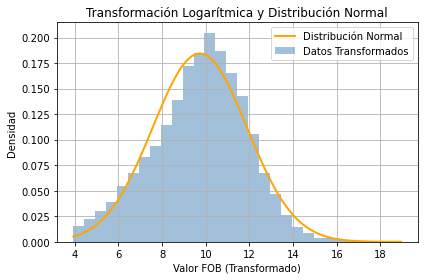

Estadístico Chi cuadrado: 7797.760578000269
Valor p: 4.755854653232651e-34
Estadístico t: nan
Valor p: nan


In [103]:
#BD3(Exportaciones por paises)
import pandas as pd
from scipy.stats import chi2_contingency

data=data.dropna()

# Transformación logarítmica
valor_fob_transformado = np.log(data['Valor FOB'])

# Ajuste de la distribución normal
mu, sigma = stats.norm.fit(valor_fob_transformado)

# Crear el histograma con los datos transformados
plt.hist(valor_fob_transformado, bins=30, density=True, alpha=0.5, color="steelblue")

# Crear la línea de la distribución normal
x = np.linspace(valor_fob_transformado.min(), valor_fob_transformado.max(), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color="orange", linewidth=2)

# Configuración del gráfico
plt.xlabel("Valor FOB (Transformado)")
plt.ylabel("Densidad")
plt.title("Transformación Logarítmica y Distribución Normal")
plt.legend(["Distribución Normal", "Datos Transformados"])
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Realizar la prueba de chi cuadrado
observed = pd.crosstab(data['Mes'], [data['Codigopais'], data['Codigovia']])
chi2_statistic, p_value, _, _ = chi2_contingency(observed)

print('Estadístico Chi cuadrado:', chi2_statistic)
print('Valor p:', p_value)

# Dividir los datos en dos grupos según los valores de 'Codigopais'
group1 = data[data['Codigopais'] == 'Grupo1']['Valor FOB'].values
group2 = data[data['Codigopais'] == 'Grupo2']['Valor FOB'].values

# Realizar la prueba t
t_statistic, p_value = ttest_ind(group1, group2)

print('Estadístico t:', t_statistic)
print('Valor p:', p_value)